In [1]:
import glob
import os
os.chdir('/home/user3/anaconda3/VAD_DNN/')
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import MRCG as mrcg
import scipy.io.wavfile
import wave
import time

%matplotlib inline
plt.style.use('ggplot')


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13 

In [2]:
sample_vad_seg_repo = os.path.join('/home/user3/anaconda3/', 'Data', 'binary_segment')
samples_vad_seg = glob.glob(os.path.join(sample_vad_seg_repo, '*[npy|npz]'), recursive=True)

samples_vad_seg = sorted(samples_vad_seg)   
print(len(samples_vad_seg))

50


In [3]:
sample_vad_seg_repo_20 = os.path.join('/home/user3/anaconda3/', 'Data', 'binary_segment', '20도')
samples_vad_seg_20 = glob.glob(os.path.join(sample_vad_seg_repo_20, '**', '*[npy|npz]'), recursive=True)

samples_vad_seg_20 = sorted(samples_vad_seg_20)   
print(len(samples_vad_seg_20))

36


In [4]:
sample_vad_seg_repo_40 = os.path.join('/home/user3/anaconda3/', 'Data', 'binary_segment', '40도')
samples_vad_seg_40 = glob.glob(os.path.join(sample_vad_seg_repo_40, '**', '*[npy|npz]'), recursive=True)

samples_vad_seg_40 = sorted(samples_vad_seg_40)   
print(len(samples_vad_seg_40))

39


In [5]:
sample_vad_seg_repo_80 = os.path.join('/home/user3/anaconda3/', 'Data', 'binary_segment', '80도')
samples_vad_seg_80 = glob.glob(os.path.join(sample_vad_seg_repo_80, '**', '*[npy|npz]'), recursive=True)

samples_vad_seg_80 = sorted(samples_vad_seg_80)   
print(len(samples_vad_seg_80))

47


In [6]:
sample_vad_seg_repo_100 = os.path.join('/home/user3/anaconda3/', 'Data', 'binary_segment', '100도')
samples_vad_seg_100 = glob.glob(os.path.join(sample_vad_seg_repo_100, '**', '*[npy|npz]'), recursive=True)

samples_vad_seg_100 = sorted(samples_vad_seg_100)   
print(len(samples_vad_seg_100))

51


In [7]:
sample_vad_seg_repo_140 = os.path.join('/home/user3/anaconda3/', 'Data', 'binary_segment', '140도')
samples_vad_seg_140 = glob.glob(os.path.join(sample_vad_seg_repo_140, '**', '*[npy|npz]'), recursive=True)

samples_vad_seg_140 = sorted(samples_vad_seg_140)   
print(len(samples_vad_seg_140))

41


In [8]:
sample_vad_seg_repo_160 = os.path.join('/home/user3/anaconda3/', 'Data', 'binary_segment', '160도')
samples_vad_seg_160 = glob.glob(os.path.join(sample_vad_seg_repo_160, '**', '*[npy|npz]'), recursive=True)

samples_vad_seg_160 = sorted(samples_vad_seg_160)   
print(len(samples_vad_seg_160))

51


In [9]:
list(enumerate(samples_vad_seg))

[(0, '/home/user3/anaconda3/Data/binary_segment/01.npy'),
 (1, '/home/user3/anaconda3/Data/binary_segment/02.npy'),
 (2, '/home/user3/anaconda3/Data/binary_segment/03.npy'),
 (3, '/home/user3/anaconda3/Data/binary_segment/04.npy'),
 (4, '/home/user3/anaconda3/Data/binary_segment/05.npy'),
 (5, '/home/user3/anaconda3/Data/binary_segment/06.npy'),
 (6, '/home/user3/anaconda3/Data/binary_segment/07.npy'),
 (7, '/home/user3/anaconda3/Data/binary_segment/08.npy'),
 (8, '/home/user3/anaconda3/Data/binary_segment/09.npy'),
 (9, '/home/user3/anaconda3/Data/binary_segment/10.npy'),
 (10, '/home/user3/anaconda3/Data/binary_segment/11.npy'),
 (11, '/home/user3/anaconda3/Data/binary_segment/12.npy'),
 (12, '/home/user3/anaconda3/Data/binary_segment/13.npy'),
 (13, '/home/user3/anaconda3/Data/binary_segment/14.npy'),
 (14, '/home/user3/anaconda3/Data/binary_segment/15.npy'),
 (15, '/home/user3/anaconda3/Data/binary_segment/16.npy'),
 (16, '/home/user3/anaconda3/Data/binary_segment/17.npy'),
 (17, '

In [10]:
list(enumerate(samples_vad_seg_20))

[(0, '/home/user3/anaconda3/Data/binary_segment/20도/output00.npz'),
 (1, '/home/user3/anaconda3/Data/binary_segment/20도/output01.npz'),
 (2, '/home/user3/anaconda3/Data/binary_segment/20도/output02.npz'),
 (3, '/home/user3/anaconda3/Data/binary_segment/20도/output03.npz'),
 (4, '/home/user3/anaconda3/Data/binary_segment/20도/output04.npz'),
 (5, '/home/user3/anaconda3/Data/binary_segment/20도/output05.npz'),
 (6, '/home/user3/anaconda3/Data/binary_segment/20도/output06.npz'),
 (7, '/home/user3/anaconda3/Data/binary_segment/20도/output07.npz'),
 (8, '/home/user3/anaconda3/Data/binary_segment/20도/output08.npz'),
 (9, '/home/user3/anaconda3/Data/binary_segment/20도/output09.npz'),
 (10, '/home/user3/anaconda3/Data/binary_segment/20도/output10.npz'),
 (11, '/home/user3/anaconda3/Data/binary_segment/20도/output11.npz'),
 (12, '/home/user3/anaconda3/Data/binary_segment/20도/output12.npz'),
 (13, '/home/user3/anaconda3/Data/binary_segment/20도/output13.npz'),
 (14, '/home/user3/anaconda3/Data/binary_seg

In [11]:
list(enumerate(samples_vad_seg_40))

[(0, '/home/user3/anaconda3/Data/binary_segment/40도/output00.npz'),
 (1, '/home/user3/anaconda3/Data/binary_segment/40도/output01.npz'),
 (2, '/home/user3/anaconda3/Data/binary_segment/40도/output02.npz'),
 (3, '/home/user3/anaconda3/Data/binary_segment/40도/output03.npz'),
 (4, '/home/user3/anaconda3/Data/binary_segment/40도/output04.npz'),
 (5, '/home/user3/anaconda3/Data/binary_segment/40도/output05.npz'),
 (6, '/home/user3/anaconda3/Data/binary_segment/40도/output06.npz'),
 (7, '/home/user3/anaconda3/Data/binary_segment/40도/output07.npz'),
 (8, '/home/user3/anaconda3/Data/binary_segment/40도/output08.npz'),
 (9, '/home/user3/anaconda3/Data/binary_segment/40도/output09.npz'),
 (10, '/home/user3/anaconda3/Data/binary_segment/40도/output10.npz'),
 (11, '/home/user3/anaconda3/Data/binary_segment/40도/output11.npz'),
 (12, '/home/user3/anaconda3/Data/binary_segment/40도/output12.npz'),
 (13, '/home/user3/anaconda3/Data/binary_segment/40도/output13.npz'),
 (14, '/home/user3/anaconda3/Data/binary_seg

In [12]:
list(enumerate(samples_vad_seg_80))

[(0, '/home/user3/anaconda3/Data/binary_segment/80도/output00.npz'),
 (1, '/home/user3/anaconda3/Data/binary_segment/80도/output01.npz'),
 (2, '/home/user3/anaconda3/Data/binary_segment/80도/output02.npz'),
 (3, '/home/user3/anaconda3/Data/binary_segment/80도/output03.npz'),
 (4, '/home/user3/anaconda3/Data/binary_segment/80도/output04.npz'),
 (5, '/home/user3/anaconda3/Data/binary_segment/80도/output05.npz'),
 (6, '/home/user3/anaconda3/Data/binary_segment/80도/output06.npz'),
 (7, '/home/user3/anaconda3/Data/binary_segment/80도/output07.npz'),
 (8, '/home/user3/anaconda3/Data/binary_segment/80도/output08.npz'),
 (9, '/home/user3/anaconda3/Data/binary_segment/80도/output09.npz'),
 (10, '/home/user3/anaconda3/Data/binary_segment/80도/output10.npz'),
 (11, '/home/user3/anaconda3/Data/binary_segment/80도/output11.npz'),
 (12, '/home/user3/anaconda3/Data/binary_segment/80도/output12.npz'),
 (13, '/home/user3/anaconda3/Data/binary_segment/80도/output13.npz'),
 (14, '/home/user3/anaconda3/Data/binary_seg

In [13]:
list(enumerate(samples_vad_seg_100))

[(0, '/home/user3/anaconda3/Data/binary_segment/100도/output00.npz'),
 (1, '/home/user3/anaconda3/Data/binary_segment/100도/output01.npz'),
 (2, '/home/user3/anaconda3/Data/binary_segment/100도/output02.npz'),
 (3, '/home/user3/anaconda3/Data/binary_segment/100도/output03.npz'),
 (4, '/home/user3/anaconda3/Data/binary_segment/100도/output04.npz'),
 (5, '/home/user3/anaconda3/Data/binary_segment/100도/output05.npz'),
 (6, '/home/user3/anaconda3/Data/binary_segment/100도/output06.npz'),
 (7, '/home/user3/anaconda3/Data/binary_segment/100도/output07.npz'),
 (8, '/home/user3/anaconda3/Data/binary_segment/100도/output08.npz'),
 (9, '/home/user3/anaconda3/Data/binary_segment/100도/output09.npz'),
 (10, '/home/user3/anaconda3/Data/binary_segment/100도/output10.npz'),
 (11, '/home/user3/anaconda3/Data/binary_segment/100도/output11.npz'),
 (12, '/home/user3/anaconda3/Data/binary_segment/100도/output12.npz'),
 (13, '/home/user3/anaconda3/Data/binary_segment/100도/output13.npz'),
 (14, '/home/user3/anaconda3/D

In [14]:
list(enumerate(samples_vad_seg_140))

[(0, '/home/user3/anaconda3/Data/binary_segment/140도/output00.npz'),
 (1, '/home/user3/anaconda3/Data/binary_segment/140도/output01.npz'),
 (2, '/home/user3/anaconda3/Data/binary_segment/140도/output02.npz'),
 (3, '/home/user3/anaconda3/Data/binary_segment/140도/output03.npz'),
 (4, '/home/user3/anaconda3/Data/binary_segment/140도/output04.npz'),
 (5, '/home/user3/anaconda3/Data/binary_segment/140도/output05.npz'),
 (6, '/home/user3/anaconda3/Data/binary_segment/140도/output06.npz'),
 (7, '/home/user3/anaconda3/Data/binary_segment/140도/output07.npz'),
 (8, '/home/user3/anaconda3/Data/binary_segment/140도/output08.npz'),
 (9, '/home/user3/anaconda3/Data/binary_segment/140도/output09.npz'),
 (10, '/home/user3/anaconda3/Data/binary_segment/140도/output10.npz'),
 (11, '/home/user3/anaconda3/Data/binary_segment/140도/output11.npz'),
 (12, '/home/user3/anaconda3/Data/binary_segment/140도/output12.npz'),
 (13, '/home/user3/anaconda3/Data/binary_segment/140도/output13.npz'),
 (14, '/home/user3/anaconda3/D

In [15]:
list(enumerate(samples_vad_seg_160))

[(0, '/home/user3/anaconda3/Data/binary_segment/160도/output00.npz'),
 (1, '/home/user3/anaconda3/Data/binary_segment/160도/output01.npz'),
 (2, '/home/user3/anaconda3/Data/binary_segment/160도/output02.npz'),
 (3, '/home/user3/anaconda3/Data/binary_segment/160도/output03.npz'),
 (4, '/home/user3/anaconda3/Data/binary_segment/160도/output04.npz'),
 (5, '/home/user3/anaconda3/Data/binary_segment/160도/output05.npz'),
 (6, '/home/user3/anaconda3/Data/binary_segment/160도/output06.npz'),
 (7, '/home/user3/anaconda3/Data/binary_segment/160도/output07.npz'),
 (8, '/home/user3/anaconda3/Data/binary_segment/160도/output08.npz'),
 (9, '/home/user3/anaconda3/Data/binary_segment/160도/output09.npz'),
 (10, '/home/user3/anaconda3/Data/binary_segment/160도/output10.npz'),
 (11, '/home/user3/anaconda3/Data/binary_segment/160도/output11.npz'),
 (12, '/home/user3/anaconda3/Data/binary_segment/160도/output12.npz'),
 (13, '/home/user3/anaconda3/Data/binary_segment/160도/output13.npz'),
 (14, '/home/user3/anaconda3/D

In [16]:
sample_data_repo = os.path.join('..', 'Data', 'sample_data', 't3_audio')
samples = glob.glob(os.path.join(sample_data_repo, '**', '*wav'), recursive=True)
samples = sorted(samples)   # sort the samples
print(len(samples))

50


In [17]:
sample_data_20 = os.path.join('..', 'Data', 'sample_data', '20도')
samples_20 = glob.glob(os.path.join(sample_data_20, '**', '*wav'), recursive=True)
samples_20 = sorted(samples_20)   # sort the samples
print(len(samples_20))

36


In [18]:
sample_data_40 = os.path.join('..', 'Data', 'sample_data', '40도')
samples_40 = glob.glob(os.path.join(sample_data_40, '**', '*wav'), recursive=True)
samples_40 = sorted(samples_40)   # sort the samples
print(len(samples_40))

39


In [19]:
sample_data_80 = os.path.join('..', 'Data', 'sample_data', '80도')
samples_80 = glob.glob(os.path.join(sample_data_80, '**', '*wav'), recursive=True)
samples_80 = sorted(samples_80)   # sort the samples
print(len(samples_80))

47


In [20]:
sample_data_100 = os.path.join('..', 'Data', 'sample_data', '100도')
samples_100 = glob.glob(os.path.join(sample_data_100, '**', '*wav'), recursive=True)
samples_100 = sorted(samples_100)   # sort the samples
print(len(samples_100))

51


In [21]:
sample_data_140 = os.path.join('..', 'Data', 'sample_data', '140도')
samples_140 = glob.glob(os.path.join(sample_data_140, '**', '*wav'), recursive=True)
samples_140 = sorted(samples_140)   # sort the samples
print(len(samples_140))

41


In [22]:
sample_data_160 = os.path.join('..', 'Data', 'sample_data', '160도')
samples_160 = glob.glob(os.path.join(sample_data_160, '**', '*wav'), recursive=True)
samples_160 = sorted(samples_160)   # sort the samples
print(len(samples_160))

51


In [23]:
def mrcg_transpose(file_path, sr=44100):
    X, sample_rate = librosa.load(file_path, sr=sr, mono=False)
    mrcg_L = mrcg.mrcg_extract(X[0], sample_rate)
    mrcg_R = mrcg.mrcg_extract(X[1], sample_rate)
    
    return mrcg_L, mrcg_R

In [24]:
def generate_instances(array_2d, seq_len, hop, label):

    row_size, col_size = array_2d.shape[0], array_2d.shape[1]
    rate = len(label)/col_size
    stack_array = []    # 4D tensor that will hold the instances
    label_array = []

    j=0
    while j <= (col_size - (seq_len+1)): 
        context_frame = array_2d[:, j:(j+seq_len)]
        seg_label = round(label[int(j*rate):int((j+seq_len)*rate)].mean())
        
        stack_array.append(context_frame[:,:,np.newaxis])      # make context_frame to 3d tensor and append 
        label_array.append(seg_label)
            
        j = j+hop
        
    return np.stack(stack_array, axis=0), label_array

In [25]:
def generate_instances_no_label(array_2d, seq_len, hop):

    row_size, col_size = array_2d.shape[0], array_2d.shape[1]
    stack_array = []    # 4D tensor that will hold the instances

    j=0
    while j <= (col_size - (seq_len+1)): 
        context_frame = array_2d[:, j:(j+seq_len)]
        stack_array.append(context_frame[:,:,np.newaxis])      # make context_frame to 3d tensor and append 
            
        j = j+hop
        
    return np.stack(stack_array, axis=0)

In [26]:
mrcg_L_tensor = []
mrcg_R_tensor = []
label_list = []

for i in range(0,50):
    deg = np.load(samples_vad_seg[i])
    if('npy' in samples_vad_seg[i].split('/')[-1]):
        label = deg[0]
    else:
        label = deg["label"]
        
    mrcg_L, mrcg_R = mrcg_transpose(samples[i])
    mrcg_L_stack, label_array = generate_instances(mrcg_L, 100, 10, label)
    mrcg_R_stack, label_array = generate_instances(mrcg_R, 100, 10, label)
    
    mrcg_L_tensor.append(mrcg_L_stack)
    mrcg_R_tensor.append(mrcg_R_stack)
    label_list.append(label_array)

fftfilter
6.343386000000001
gamma total
8.446133
coch1
2.9827270000000006
coch2
3.3208249999999992
get avg
0.02672199999999947
fftfilter
6.101801999999999
gamma total
8.141817000000003
coch1
2.9596729999999987
coch2
3.325026000000001
get avg
0.02768700000000024
fftfilter
3.039186000000001
gamma total
3.9087050000000048
coch1
1.404484999999994
coch2
2.0228390000000047
get avg
0.31684700000000277
fftfilter
3.524839
gamma total
4.740273999999999
coch1
1.510189000000004
coch2
1.9209159999999983
get avg
0.23624699999999876
fftfilter
5.580116000000004
gamma total
7.4166799999999995
coch1
2.329855000000002
coch2
3.1874110000000044
get avg
0.12697900000000573
fftfilter
5.092242999999996
gamma total
6.941035999999997
coch1
2.440279000000004
coch2
3.268495999999999
get avg
0.049912000000006174
fftfilter
6.770090999999994
gamma total
9.184219999999996
coch1
3.304216000000011
coch2
3.3867249999999984
get avg
0.06506600000000162
fftfilter
7.152979000000002
gamma total
9.588209000000006
coch1
3.3257

fftfilter
7.162658999999962
gamma total
9.605136000000016
coch1
3.2953209999999444
coch2
3.36368200000004
get avg
0.06329299999993054
fftfilter
7.898265000000038
gamma total
10.244002999999907
coch1
2.8145560000000387
coch2
3.3281829999999673
get avg
0.06059699999991608
fftfilter
6.71679000000006
gamma total
9.104825000000005
coch1
3.3217509999999493
coch2
3.376220999999987
get avg
0.060661999999979344
fftfilter
4.40768300000002
gamma total
5.27954699999998
coch1
1.9523890000000392
coch2
2.5871969999999465
get avg
0.3022799999999961
fftfilter
4.527660000000083
gamma total
5.398428999999965
coch1
1.872451999999953
coch2
2.4914190000000644
get avg
0.28587500000003274
fftfilter
8.69181500000002
gamma total
11.430986000000075
coch1
3.469416000000024
coch2
3.5097389999999677
get avg
0.10930899999993926
fftfilter
8.608327000000031
gamma total
11.261036999999988
coch1
3.376010000000065
coch2
3.5161829999999554
get avg
0.09809900000004745
fftfilter
6.1270099999999275
gamma total
8.199438999999

In [27]:
for i in range(0, len(samples_20)):
    deg = np.load(samples_vad_seg_20[i])
    if('npy' in samples_vad_seg_20[i].split('/')[-1]):
        label = deg[0]
    else:
        label = deg["label"]
        
    mrcg_L, mrcg_R = mrcg_transpose(samples_20[i])
    mrcg_L_stack, label_array = generate_instances(mrcg_L, 100, 10, label)
    mrcg_R_stack, label_array = generate_instances(mrcg_R, 100, 10, label)
    
    mrcg_L_tensor.append(mrcg_L_stack)
    mrcg_R_tensor.append(mrcg_R_stack)
    label_list.append(label_array)

fftfilter
8.882770000000164
gamma total
11.395942000000105
coch1
3.3650609999999688
coch2
3.462344999999914
get avg
0.07467100000008031
fftfilter
8.080373000000009
gamma total
10.575072000000091
coch1
3.368575999999848
coch2
3.461819999999989
get avg
0.0749510000000555
fftfilter
42.333169
gamma total
49.57683799999995
coch1
4.773376000000098
coch2
5.20318199999997
get avg
2.2333909999999833
fftfilter
44.80767900000001
gamma total
52.149520000000166
coch1
4.871314999999868
coch2
5.337662000000137
get avg
2.4263639999999214
fftfilter
8.302828999999974
gamma total
10.833685999999943
coch1
3.348664000000099
coch2
3.426913999999897
get avg
0.07568600000013248
fftfilter
8.992210999999998
gamma total
11.486834999999928
coch1
3.3951629999999113
coch2
3.5201260000001184
get avg
0.07593399999996109
fftfilter
9.19439999999986
gamma total
11.72202900000002
coch1
3.420176000000083
coch2
3.468503000000055
get avg
0.07792399999993904
fftfilter
9.655275999999958
gamma total
12.190039999999954
coch1
3.

fftfilter
44.950589000000036
gamma total
52.43384900000001
coch1
4.847135999999864
coch2
5.3935059999998884
get avg
2.425793999999769
fftfilter
8.922420999999758
gamma total
11.622537000000193
coch1
3.441737000000103
coch2
3.4463599999999133
get avg
0.07420700000011493
fftfilter
7.971404999999777
gamma total
10.603325999999925
coch1
3.412135000000035
coch2
3.52523199999996
get avg
0.1073740000001635
fftfilter
173.86290700000018
gamma total
182.19656600000008
coch1
10.300935999999638
coch2
12.968330000000151
get avg
3.7868670000002567
fftfilter
176.31753800000024
gamma total
184.96249100000023
coch1
12.608556000000135
coch2
12.256754999999885
get avg
3.740874000000076
fftfilter
44.086287000000084
gamma total
51.41602499999999
coch1
5.088537000000088
coch2
5.392202999999881
get avg
2.450360000000728
fftfilter
47.996618000000126
gamma total
55.38925500000005
coch1
4.8268389999993815
coch2
5.322129000000132
get avg
2.2350160000005417
fftfilter
46.45045900000059
gamma total
53.8740799999995

In [28]:
for i in range(0, len(samples_40)):
    deg = np.load(samples_vad_seg_40[i])
    if('npy' in samples_vad_seg_40[i].split('/')[-1]):
        label = deg[0]
    else:
        label = deg["label"]
        
    mrcg_L, mrcg_R = mrcg_transpose(samples_40[i])
    mrcg_L_stack, label_array = generate_instances(mrcg_L, 100, 10, label)
    mrcg_R_stack, label_array = generate_instances(mrcg_R, 100, 10, label)
    
    mrcg_L_tensor.append(mrcg_L_stack)
    mrcg_R_tensor.append(mrcg_R_stack)
    label_list.append(label_array)

fftfilter
8.702822000000197
gamma total
11.219958000000588
coch1
3.1009699999995064
coch2
3.3940870000005816
get avg
0.0760999999993146
fftfilter
9.566521000000648
gamma total
12.105083999999806
coch1
3.025322999999844
coch2
3.381908000000294
get avg
0.07397799999944255
fftfilter
8.914748000000145
gamma total
11.410907000000407
coch1
3.1637510000000475
coch2
3.395078999999896
get avg
0.07747500000004948
fftfilter
10.454640999999356
gamma total
12.979702000000543
coch1
3.383114999999634
coch2
3.4890749999995023
get avg
0.1333070000000589
fftfilter
8.982832000000599
gamma total
11.549584999999752
coch1
3.3292469999996683
coch2
3.39707400000043
get avg
0.08317499999975553
fftfilter
8.978227000000516
gamma total
11.509626999999455
coch1
3.4561659999999392
coch2
3.4663710000004357
get avg
0.111468999999488
fftfilter
49.760236999999506
gamma total
57.18613099999948
coch1
5.031890000000203
coch2
5.368257999999514
get avg
2.4254179999998087
fftfilter
45.32835900000009
gamma total
52.8202639999

fftfilter
8.958668999999645
gamma total
11.619525000000067
coch1
3.1344719999997324
coch2
3.3938779999998587
get avg
0.07436500000039814
fftfilter
45.77920300000005
gamma total
53.218950999999834
coch1
4.875632999999652
coch2
5.445951000000605
get avg
2.4227670000000217
fftfilter
45.511726000000635
gamma total
52.86797299999944
coch1
5.175751000000673
coch2
5.386778000000049
get avg
2.4156519999996817
fftfilter
8.834055000000262
gamma total
11.418410000000222
coch1
3.3916189999999915
coch2
3.4668289999999615
get avg
0.08329700000012963
fftfilter
9.584523999999874
gamma total
12.106800999999905
coch1
3.4157979999999952
coch2
3.445838999999978
get avg
0.07213899999987916
fftfilter
8.991829000000507
gamma total
11.516983000000437
coch1
3.2897619999994276
coch2
3.400980000000345
get avg
0.07695700000022043
fftfilter
8.78189199999997
gamma total
11.425843999999415
coch1
3.399265000000014
coch2
3.5106550000000425
get avg
0.07758300000023155
fftfilter
9.206696000000193
gamma total
11.88766599

In [29]:
for i in range(0, len(samples_80)):
    deg = np.load(samples_vad_seg_80[i])
    if('npy' in samples_vad_seg_80[i].split('/')[-1]):
        label = deg[0]
    else:
        label = deg["label"]
        
    mrcg_L, mrcg_R = mrcg_transpose(samples_80[i])
    mrcg_L_stack, label_array = generate_instances(mrcg_L, 100, 10, label)
    mrcg_R_stack, label_array = generate_instances(mrcg_R, 100, 10, label)
    
    mrcg_L_tensor.append(mrcg_L_stack)
    mrcg_R_tensor.append(mrcg_R_stack)
    label_list.append(label_array)

fftfilter
8.266811999999845
gamma total
10.798746999999821
coch1
3.4163610000005065
coch2
3.5430820000001404
get avg
0.0725670000001628
fftfilter
8.276598999999806
gamma total
10.761947999999393
coch1
3.4477740000002086
coch2
3.4547899999997753
get avg
0.08975199999986216
fftfilter
8.861399999999776
gamma total
11.467821000000185
coch1
3.4409670000004553
coch2
3.4634390000001076
get avg
0.10569800000030227
fftfilter
7.859168999999383
gamma total
10.508285999999316
coch1
3.390809000000445
coch2
3.509704999999485
get avg
0.07544099999995524
fftfilter
8.78887399999985
gamma total
11.293472999999722
coch1
3.3518480000002455
coch2
3.412981999999829
get avg
0.07678299999952287
fftfilter
9.871240999999827
gamma total
12.393197999999757
coch1
3.4034449999999197
coch2
3.5326509999995324
get avg
0.11035699999956705
fftfilter
44.35086499999943
gamma total
51.66033100000004
coch1
4.952376999999615
coch2
5.103755000000092
get avg
2.4137089999994714
fftfilter
45.94271799999933
gamma total
53.2945720

fftfilter
203.05832799999916
gamma total
211.63292799999908
coch1
10.420826999999917
coch2
15.282420999999886
get avg
3.8121980000014446
fftfilter
46.130262000000585
gamma total
53.61638700000003
coch1
5.12277499999982
coch2
5.34845100000166
get avg
2.431232999999338
fftfilter
46.59371900000042
gamma total
53.937050999998974
coch1
4.771195000001171
coch2
4.95271799999864
get avg
2.4225169999990612
fftfilter
8.800420999999915
gamma total
11.313974000000599
coch1
3.0985039999995934
coch2
3.3738499999999476
get avg
0.07367499999963911
fftfilter
8.978997000000163
gamma total
11.513224000000264
coch1
3.386586000000534
coch2
3.537605999999869
get avg
0.07655999999951746
fftfilter
9.007258000001457
gamma total
11.496859999999288
coch1
3.2167289999997593
coch2
3.3907280000003084
get avg
0.07313499999872874
fftfilter
9.075496999999814
gamma total
11.662641999999323
coch1
3.360160000000178
coch2
3.4143220000005385
get avg
0.07368300000052841
fftfilter
9.017272000000958
gamma total
11.54569899999

In [30]:
for i in range(0, len(samples_100)):
    deg = np.load(samples_vad_seg_100[i])
    if('npy' in samples_vad_seg_100[i].split('/')[-1]):
        label = deg[0]
    else:
        label = deg["label"]
        
    mrcg_L, mrcg_R = mrcg_transpose(samples_100[i])
    mrcg_L_stack, label_array = generate_instances(mrcg_L, 100, 10, label)
    mrcg_R_stack, label_array = generate_instances(mrcg_R, 100, 10, label)
    
    mrcg_L_tensor.append(mrcg_L_stack)
    mrcg_R_tensor.append(mrcg_R_stack)
    label_list.append(label_array)

fftfilter
8.7884439999998
gamma total
11.302450000001045
coch1
3.4175820000000385
coch2
3.498074999999517
get avg
0.1096159999997326
fftfilter
9.086671000000933
gamma total
11.78219099999842
coch1
3.367528000000675
coch2
3.4794830000009824
get avg
0.07470000000103028
fftfilter
8.361093999999866
gamma total
10.901496000000407
coch1
3.3315640000000712
coch2
3.3912400000008347
get avg
0.09096499999941443
fftfilter
8.955008999999336
gamma total
11.455392999998367
coch1
3.4333480000004784
coch2
3.4667090000002645
get avg
0.13834400000087044
fftfilter
9.029848000000129
gamma total
11.54016799999954
coch1
2.892537000001539
coch2
3.3756560000001627
get avg
0.07533900000089488
fftfilter
8.947821000001568
gamma total
11.442779999999402
coch1
3.401627000001099
coch2
3.462625999998636
get avg
0.07337399999960326
fftfilter
44.17449800000031
gamma total
51.549707000000126
coch1
5.243432999999641
coch2
5.399373000000196
get avg
2.4235529999987193
fftfilter
45.08547500000168
gamma total
52.51184999999

gamma total
191.704525000001
coch1
9.656133999998929
coch2
10.500484000000142
get avg
3.76317200000085
fftfilter
46.54832499999975
gamma total
53.84884899999997
coch1
4.51087600000028
coch2
4.837444000000687
get avg
2.4323220000005676
fftfilter
48.2602799999986
gamma total
55.69232799999918
coch1
4.6002320000006875
coch2
4.6336670000000595
get avg
2.4333760000008624
fftfilter
8.677578000000722
gamma total
11.24311200000011
coch1
3.324689999999464
coch2
3.37520300000142
get avg
0.07514799999989918
fftfilter
8.71901699999944
gamma total
11.250121999999465
coch1
3.3293089999988297
coch2
3.386286000000837
get avg
0.07416000000011991
fftfilter
8.778268000000025
gamma total
11.326638000000457
coch1
3.1094210000010207
coch2
3.3804979999986244
get avg
0.07429699999920558
fftfilter
8.90111699999943
gamma total
11.412975000001097
coch1
3.23535499999889
coch2
3.35928800000147
get avg
0.07492199999978766
fftfilter
9.32399500000065
gamma total
11.844451999999364
coch1
3.187966999999844
coch2
3.3962

In [31]:
for i in range(0, len(samples_140)):
    deg = np.load(samples_vad_seg_140[i])
    if('npy' in samples_vad_seg_140[i].split('/')[-1]):
        label = deg[0]
    else:
        label = deg["label"]
        
    mrcg_L, mrcg_R = mrcg_transpose(samples_140[i])
    mrcg_L_stack, label_array = generate_instances(mrcg_L, 100, 10, label)
    mrcg_R_stack, label_array = generate_instances(mrcg_R, 100, 10, label)
    
    mrcg_L_tensor.append(mrcg_L_stack)
    mrcg_R_tensor.append(mrcg_R_stack)
    label_list.append(label_array)

fftfilter
8.599471999998059
gamma total
11.142283999997744
coch1
3.33054600000105
coch2
3.4243290000013076
get avg
0.07692200000019511
fftfilter
8.735700999997789
gamma total
11.300631000001886
coch1
3.343572999998287
coch2
3.4082930000004126
get avg
0.1100460000016028
fftfilter
8.389476000000286
gamma total
11.0535970000019
coch1
3.333684999997786
coch2
3.4199330000010377
get avg
0.07376600000134204
fftfilter
9.683303000001615
gamma total
12.289480999999796
coch1
3.4100629999993544
coch2
3.419169000000693
get avg
0.0740799999985029
fftfilter
8.858531999998377
gamma total
11.384722000002512
coch1
3.33853199999794
coch2
3.4699099999997998
get avg
0.07422799999767449
fftfilter
8.776189000000159
gamma total
11.285789999998087
coch1
3.2730530000008002
coch2
3.4137289999998757
get avg
0.07524800000101095
fftfilter
44.06840699999884
gamma total
51.42032599999948
coch1
5.1024839999990945
coch2
4.962068000000727
get avg
2.4248700000025565
fftfilter
44.13827399999718
gamma total
51.720798999998

gamma total
171.56591400000252
coch1
10.068343999999342
coch2
11.143926000000647
get avg
3.816887000000861
fftfilter
48.25037599999996
gamma total
55.84342299999844
coch1
4.537750999999844
coch2
5.449674000003142
get avg
2.3879649999980757
fftfilter
43.79720599999928
gamma total
51.15021500000148
coch1
4.723621999997704
coch2
5.19135400000232
get avg
2.418663000000379
fftfilter
9.908699999999953
gamma total
12.455633000001399
coch1
3.4814259999984642
coch2
3.4767439999995986
get avg
0.13678900000013527
fftfilter
9.09610099999918
gamma total
11.634970999999496
coch1
3.4644100000004983
coch2
3.576692999999068
get avg
0.11093400000027032
fftfilter
9.009549000002153
gamma total
11.513850999999704
coch1
3.1609089999983553
coch2
3.3807879999985744
get avg
0.07522999999855529
fftfilter
9.13990399999966
gamma total
11.672772999998415
coch1
3.112680000002001
coch2
3.3938839999973425
get avg
0.07578999999896041
fftfilter
9.29276800000298
gamma total
11.796823000000586
coch1
3.4736310000007506
co

In [32]:
for i in range(0, len(samples_160)):
    deg = np.load(samples_vad_seg_160[i])
    if('npy' in samples_vad_seg_160[i].split('/')[-1]):
        label = deg[0]
    else:
        label = deg["label"]
        
    mrcg_L, mrcg_R = mrcg_transpose(samples_160[i])
    mrcg_L_stack, label_array = generate_instances(mrcg_L, 100, 10, label)
    mrcg_R_stack, label_array = generate_instances(mrcg_R, 100, 10, label)
    
    mrcg_L_tensor.append(mrcg_L_stack)
    mrcg_R_tensor.append(mrcg_R_stack)
    label_list.append(label_array)

fftfilter
228.69318700000076
gamma total
238.34406800000215
coch1
12.083802999997715
coch2
14.402720000001864
get avg
3.7196839999996882
fftfilter
229.60996299999897
gamma total
238.99216199999864
coch1
12.232890000002953
coch2
13.926057999997283
get avg
3.9750390000008338
fftfilter
55.82277500000055
gamma total
63.16729000000123
coch1
4.840968999997131
coch2
5.252462000000378
get avg
2.2745300000024145
fftfilter
62.58819799999765
gamma total
70.40236200000072
coch1
4.891250000000582
coch2
5.480915999996796
get avg
1.8755659999987984
fftfilter
10.251785000000382
gamma total
13.182768999999098
coch1
3.448498000001564
coch2
3.3414639999973588
get avg
0.1368430000002263
fftfilter
13.064888000000792
gamma total
15.831357999999454
coch1
3.518810999998095
coch2
3.4017060000005586
get avg
0.0906539999996312
fftfilter
11.02285699999993
gamma total
13.779531000000134
coch1
3.36789200000203
coch2
3.345191000000341
get avg
0.09981500000139931
fftfilter
11.57763899999918
gamma total
14.58599699999

fftfilter
13.402154999999766
gamma total
16.3960619999998
coch1
3.4467320000003383
coch2
3.3458449999998265
get avg
0.11894200000097044
fftfilter
236.22025099999883
gamma total
245.60463999999774
coch1
12.749416000002384
coch2
14.178485999997065
get avg
3.9825909999999567
fftfilter
226.86085399999865
gamma total
235.73979300000065
coch1
13.384053000001586
coch2
14.163410999997723
get avg
3.9259970000020985
fftfilter
57.96453300000212
gamma total
65.49273300000277
coch1
5.282463999999891
coch2
5.345092999999906
get avg
2.131432999998651
fftfilter
57.35317099999884
gamma total
64.71372600000177
coch1
5.248955999999453
coch2
4.994595000000118
get avg
2.4260680000006687
fftfilter
48.196014000001014
gamma total
55.711074000002554
coch1
5.226667999999336
coch2
5.344350999999733
get avg
2.4215819999990345
fftfilter
47.0260930000004
gamma total
54.61965099999725
coch1
5.122389000000112
coch2
5.448881000000256
get avg
2.4512960000029125
fftfilter
44.740663000000495
gamma total
52.41076000000248

In [33]:
mrcg_L_tensor[0].shape

(19, 768, 100, 1)

In [34]:
n_20 = 50 + len(samples_20)
n_40 = n_20 + len(samples_40)
n_80 = n_40 + len(samples_80)
n_100 = n_80 + len(samples_100)
n_140 = n_100 + len(samples_140)
n_160 = n_140 + len(samples_160)

In [35]:
total_instances_tensor = []

for i in range(0, n_160):
    concat_tensor = np.concatenate([mrcg_L_tensor[i], mrcg_R_tensor[i]], axis=-1)
    total_instances_tensor.append(concat_tensor)

In [36]:
total_instances_tensor[0].shape

(19, 768, 100, 2)

In [37]:
total_label = []

for i in range(0, n_160):
    array_label = np.array(label_list[i])
    total_label.append(array_label)

In [38]:
vad_label = []

for i in range(0, n_160):
    array_label = np.array(label_list[i])
    vad_label.append(array_label)

In [39]:
for i in range(0, n_160):
    print(total_instances_tensor[i].shape, total_label[i].shape)

(19, 768, 100, 2) (19,)
(6, 768, 100, 2) (6,)
(16, 768, 100, 2) (16,)
(24, 768, 100, 2) (24,)
(14, 768, 100, 2) (14,)
(15, 768, 100, 2) (15,)
(33, 768, 100, 2) (33,)
(21, 768, 100, 2) (21,)
(9, 768, 100, 2) (9,)
(19, 768, 100, 2) (19,)
(16, 768, 100, 2) (16,)
(28, 768, 100, 2) (28,)
(20, 768, 100, 2) (20,)
(24, 768, 100, 2) (24,)
(22, 768, 100, 2) (22,)
(30, 768, 100, 2) (30,)
(17, 768, 100, 2) (17,)
(14, 768, 100, 2) (14,)
(23, 768, 100, 2) (23,)
(30, 768, 100, 2) (30,)
(6, 768, 100, 2) (6,)
(17, 768, 100, 2) (17,)
(22, 768, 100, 2) (22,)
(23, 768, 100, 2) (23,)
(18, 768, 100, 2) (18,)
(10, 768, 100, 2) (10,)
(22, 768, 100, 2) (22,)
(15, 768, 100, 2) (15,)
(21, 768, 100, 2) (21,)
(25, 768, 100, 2) (25,)
(23, 768, 100, 2) (23,)
(23, 768, 100, 2) (23,)
(9, 768, 100, 2) (9,)
(30, 768, 100, 2) (30,)
(20, 768, 100, 2) (20,)
(14, 768, 100, 2) (14,)
(21, 768, 100, 2) (21,)
(16, 768, 100, 2) (16,)
(13, 768, 100, 2) (13,)
(29, 768, 100, 2) (29,)
(47, 768, 100, 2) (47,)
(31, 768, 100, 2) (31,)


In [40]:
val = 0
for i in range(0, n_160):
    val = val + total_instances_tensor[i].shape[0]
    
val

32983

In [41]:
for i in range(0, 12):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = -90

for i in range(12, 25):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = -30
            
for i in range(25, 38):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 30
            
for i in range(38, 50):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 90
            
for i in range(50, n_20):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = -70

for i in range(n_20, n_40):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = -50
            
for i in range(n_40, n_80):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = -10
            
for i in range(n_80, n_100):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 10
            
for i in range(n_100, n_140):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 50
            
for i in range(n_140, n_160):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 70
              
total_label

[array([-90., -90., -90., -90., -90., -90., -90., -90., -90., -90., -90.,
        -90., -90., -90., -90., -90., -90., -90., -90.]),
 array([-90., -90., -90., -90., -90., -90.]),
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0., -90., -90., -90., -90.,
        -90., -90., -90., -90., -90.]),
 array([-90., -90., -90., -90., -90., -90., -90., -90., -90., -90., -90.,
        -90., -90., -90., -90., -90., -90., -90., -90., -90., -90., -90.,
          0.,   0.]),
 array([-90., -90., -90., -90., -90., -90., -90., -90.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([-90., -90., -90., -90., -90., -90., -90., -90., -90., -90., -90.,
        -90., -90., -90.,   0.]),
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0., -90., -90., -90., -90.,
        -90., -90., -90., -90., -90., -90., -90., -90., -90., -90., -90.,
        -90., -90., -90., -90., -90., -90., -90., -90., -90.,   0.,   0.]),
 array([  0.,   0.,   0.,   0.,   0., -90., -90., -90., -90., -90., -90.,
        -90., -90., -90., -90.

In [42]:
np.random.seed(19)
idx = np.random.permutation(n_160)
idx

array([ 23,   8, 258, 138, 199, 145, 234, 211, 253, 101, 135, 284, 148,
        48,  12,  75, 179, 209,  61,  90, 243,   1, 229,  27,  36, 142,
        60, 103, 302, 121,  92, 210,  24,  15,  49,   2,  65,   6,  17,
        95, 165, 259,  98, 257, 190, 177,  37, 197, 255, 120,  64,  13,
       187, 227, 290, 285, 141, 281, 132, 168,  62, 251, 207, 223, 174,
       205, 216,  96, 119, 144,  20, 117, 171, 252, 249, 175,  86, 154,
       156, 296, 304, 184, 137, 200, 222, 300, 192, 272,  16, 176, 149,
       208, 129, 306,  87, 289, 250,  78, 143,  74, 113, 279, 276,  54,
       189, 136,  40, 139, 283, 128, 270, 160, 241, 288, 150, 185, 278,
       214, 181,  33,  66,  10, 217, 297, 230, 235, 158, 202,  11,  45,
        41,  26,  31, 312,  34, 146,  91, 277,  57, 237, 108,  71, 161,
       178, 115,  30,  35,  72, 254, 307,  50, 163, 293,  82,   7, 294,
        42,  58, 180,  14, 314, 130, 219, 238, 186,  59, 299, 280,  70,
        81, 261,  83, 164, 242, 155,  89, 204, 292, 236, 104, 15

In [43]:
X = []
y = []
vad = []

for i in range(0, n_160):
    X.append(total_instances_tensor[idx[i]])
    y.append(total_label[idx[i]])
    vad.append(vad_label[idx[i]])

In [44]:
for i in range(0, n_160):
    print(X[i].shape[0], y[i].shape, vad[i].shape)

23 (23,) (23,)
9 (9,) (9,)
191 (191,) (191,)
191 (191,) (191,)
191 (191,) (191,)
30 (30,) (30,)
191 (191,) (191,)
30 (30,) (30,)
793 (793,) (793,)
30 (30,) (30,)
191 (191,) (191,)
30 (30,) (30,)
191 (191,) (191,)
20 (20,) (20,)
20 (20,) (20,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
191 (191,) (191,)
30 (30,) (30,)
6 (6,) (6,)
30 (30,) (30,)
15 (15,) (15,)
21 (21,) (21,)
191 (191,) (191,)
191 (191,) (191,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
191 (191,) (191,)
191 (191,) (191,)
18 (18,) (18,)
30 (30,) (30,)
18 (18,) (18,)
16 (16,) (16,)
191 (191,) (191,)
33 (33,) (33,)
14 (14,) (14,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
793 (793,) (793,)
16 (16,) (16,)
191 (191,) (191,)
30 (30,) (30,)
30 (30,) (30,)
191 (191,) (191,)
24 (24,) (24,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
30 (30,) (30,)
191 (191,) (191,)
191 (191,) (191,)
30 (30,) (30,)
191 (191,) (191,)
30 (30,) (30,)
191 (191,) (191,)
191 (191,) (191,

In [45]:
train_idx = round(n_160 * 0.8)
X_train = np.concatenate(X[:train_idx], axis=0)
y_train = np.concatenate(y[:train_idx], axis=0)
vad_train = np.concatenate(vad[:train_idx], axis=0)

X_train.shape, y_train.shape, vad_train.shape

((27149, 768, 100, 2), (27149,), (27149,))

In [46]:
X_val = np.concatenate(X[train_idx: ], axis=0)
y_val = np.concatenate(y[train_idx: ], axis=0)
vad_val = np.concatenate(vad[train_idx: ], axis=0)

X_val.shape, y_val.shape, vad_val.shape

((5834, 768, 100, 2), (5834,), (5834,))

In [47]:
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dropout, Dense, Reshape, Conv1D
from keras.models import Model

input_spectrogram = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

conv_1 = Conv2D(16, (3, 3), activation='relu')(input_spectrogram)
max_pool_1 = MaxPooling2D((2, 2))(conv_1)

conv_2 = Conv2D(32, (3, 3), activation='relu')(max_pool_1)
max_pool_2 = MaxPooling2D((2, 2))(conv_2)

conv_3 = Conv2D(64, (3, 3), strides=(2,1), activation='relu')(max_pool_2)
conv_3_1 = Conv2D(64, (3, 2), strides=(2,1), activation='relu')(conv_3)
max_pool_3 = MaxPooling2D((3, 2), name='max_pool_3')(conv_3_1)

shape_max_pool_3 = max_pool_3.get_shape().as_list()    # (None, height, width, channel)
print("shape_max_pool_3 : ", shape_max_pool_3)
# reshaped = layers.Reshape((-1, shape_list[1]*shape_list[3]))(max_pool_3)

conv_4 = Conv2D(1024, (shape_max_pool_3[1], 1), padding='valid', activation='relu')(max_pool_3)
shape_conv_4 = conv_4.get_shape().as_list()
print("shape_conv_4 : ", shape_conv_4)

reshaped = Reshape((shape_conv_4[2], shape_conv_4[3]))(conv_4) # reshape to (timesteps, features) explicitly 

conv_5 = Conv1D(512, kernel_size=3, activation='relu')(reshaped)

flatten = Flatten()(conv_5)
# flatten_drop = Dropout(0.3)(flatten)

fc1 = Dense(32, activation='relu')(flatten)
fc1_drop = Dropout(0.1)(fc1)

vad_out = Dense(1, activation='sigmoid', name='vad_output')(fc1_drop)
dense_out = Dense(1, activation='linear', name='reg_output')(fc1_drop)


model = Model(inputs=input_spectrogram, outputs=[vad_out, dense_out])
model.summary()

Using TensorFlow backend.


shape_max_pool_3 :  [None, 15, 10, 64]
shape_conv_4 :  [None, 1, 10, 1024]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 768, 100, 2)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 766, 98, 16)  304         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 383, 49, 16)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 381, 47, 32)  4640        max_pooling2d_1[0][0]            
__________________________________

In [48]:
from keras.utils import multi_gpu_model

model = multi_gpu_model(model, gpus=8, cpu_relocation=True)

In [49]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(optimizer ='rmsprop', loss={'vad_output' : 'binary_crossentropy', 'reg_output' : 'mse'},
              metrics ={'vad_output' : 'acc', 'reg_output' : 'mse'})

callbacks_list = [EarlyStopping(monitor='loss', patience=20),
                 ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]

history = model.fit(X_train, [vad_train, y_train],
                    epochs=150, batch_size=64, 
                    callbacks=callbacks_list,
                    validation_data=(X_val, [vad_val, y_val]),
                    shuffle=True)

Train on 27149 samples, validate on 5834 samples
Epoch 1/150
27149/27149 [==============================] - 69s 3ms/step - loss: 225.1290 - vad_output_loss: 0.5838 - reg_output_loss: 224.5451 - vad_output_acc: 0.8896 - reg_output_mean_squared_error: 224.5451 - val_loss: 149.2317 - val_vad_output_loss: 0.1290 - val_reg_output_loss: 149.1028 - val_vad_output_acc: 0.9604 - val_reg_output_mean_squared_error: 149.1028
Epoch 2/150
27149/27149 [==============================] - 61s 2ms/step - loss: 96.8235 - vad_output_loss: 0.1830 - reg_output_loss: 96.6405 - vad_output_acc: 0.9499 - reg_output_mean_squared_error: 96.6405 - val_loss: 148.7728 - val_vad_output_loss: 0.1998 - val_reg_output_loss: 148.5730 - val_vad_output_acc: 0.9326 - val_reg_output_mean_squared_error: 148.5730
Epoch 3/150
27149/27149 [==============================] - 62s 2ms/step - loss: 66.7972 - vad_output_loss: 0.1536 - reg_output_loss: 66.6436 - vad_output_acc: 0.9555 - reg_output_mean_squared_error: 66.6436 - val_loss:

/home/user3/.conda/envs/hun/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210288). Check your callbacks.
  % delta_t_median)
/home/user3/.conda/envs/hun/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105738). Check your callbacks.
  % delta_t_median)


27149/27149 [==============================] - 60s 2ms/step - loss: 20.7227 - vad_output_loss: 0.0367 - reg_output_loss: 20.6859 - vad_output_acc: 0.9924 - reg_output_mean_squared_error: 20.6859 - val_loss: 87.8907 - val_vad_output_loss: 0.1531 - val_reg_output_loss: 87.7375 - val_vad_output_acc: 0.9565 - val_reg_output_mean_squared_error: 87.7375
Epoch 12/150
27149/27149 [==============================] - 56s 2ms/step - loss: 21.1416 - vad_output_loss: 0.0372 - reg_output_loss: 21.1043 - vad_output_acc: 0.9925 - reg_output_mean_squared_error: 21.1043 - val_loss: 82.5176 - val_vad_output_loss: 0.0463 - val_reg_output_loss: 82.4713 - val_vad_output_acc: 0.9895 - val_reg_output_mean_squared_error: 82.4713
Epoch 13/150
27149/27149 [==============================] - 58s 2ms/step - loss: 17.9259 - vad_output_loss: 0.0295 - reg_output_loss: 17.8964 - vad_output_acc: 0.9942 - reg_output_mean_squared_error: 17.8964 - val_loss: 69.6499 - val_vad_output_loss: 0.0502 - val_reg_output_loss: 69.599


KeyboardInterrupt



In [100]:
def predict(model, file_path):
    mrcg_L, mrcg_R = mrcg_transpose(file_path, sr=44100)
    mrcg_L_stack = generate_instances_no_label(mrcg_L, 100, 10)
    mrcg_R_stack = generate_instances_no_label(mrcg_R, 100, 10)
    X = np.concatenate([mrcg_L_stack, mrcg_R_stack], axis=-1)
    vad_pred, pred = model.predict(X)
    vad_pred = np.where(vad_pred >= 0.5, 1, 0)
    return vad_pred, pred

In [101]:
val_list = idx[train_idx:]
edge_list = []

for i in range(0, len(val_list)):
    val_idx = val_list[i]
    
    if((val_idx >= 0) & (val_idx < 12)):
        edge_list.append(0)
    elif((val_idx >= 12) & (val_idx < 25)):
        edge_list.append(60)
    elif((val_idx >= 25) & (val_idx < 38)):
        edge_list.append(120)
    elif((val_idx >= 38) & (val_idx < 50)):
        edge_list.append(180)
    elif((val_idx >= 50) & (val_idx < n_20)):
        edge_list.append(20)
    elif((val_idx >= n_20) & (val_idx < n_40)):
        edge_list.append(40)
    elif((val_idx >= n_40) & (val_idx < n_80)):
        edge_list.append(80)
    elif((val_idx >= n_80) & (val_idx < n_100)):
        edge_list.append(100)
    elif((val_idx >= n_100) & (val_idx < n_140)):
        edge_list.append(140)
    elif((val_idx >= n_140) & (val_idx < n_160)):
        edge_list.append(160)

len(val_list), len(edge_list)

(63, 63)

fftfilter
8.580853000006755
gamma total
11.197305999994569
coch1
3.387203000005684
coch2
3.4984629999962635
get avg
0.09682099999918137
fftfilter
8.440988000002108
gamma total
11.071584999997867
coch1
3.394295999998576
coch2
3.5107410000055097
get avg
0.07675699999526842


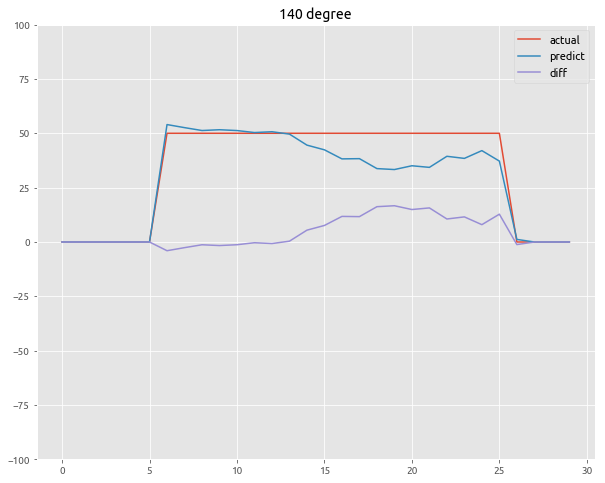

RMSE: 7.908970074861755 


fftfilter
44.398293999998714
gamma total
51.95260500000586
coch1
4.844717999993009
coch2
5.183794000004127
get avg
2.2275700000027427
fftfilter
45.0371540000051
gamma total
52.59095399999933
coch1
4.931824999999662
coch2
5.416956000000937
get avg
2.2448850000000675


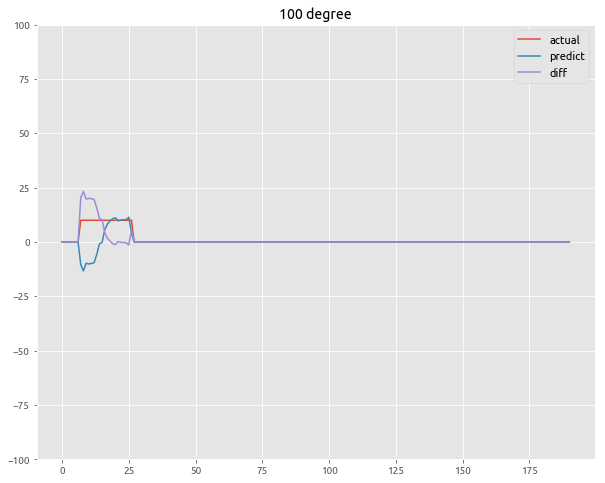

RMSE: 18.81810154656713 


fftfilter
9.022891000000527
gamma total
11.696755000004487
coch1
3.4158800000004703
coch2
3.482059999994817
get avg
0.09583899999415735
fftfilter
9.16808999999921
gamma total
11.735764999997627
coch1
3.419405000000552
coch2
3.5206360000011045
get avg
0.07669399999576854


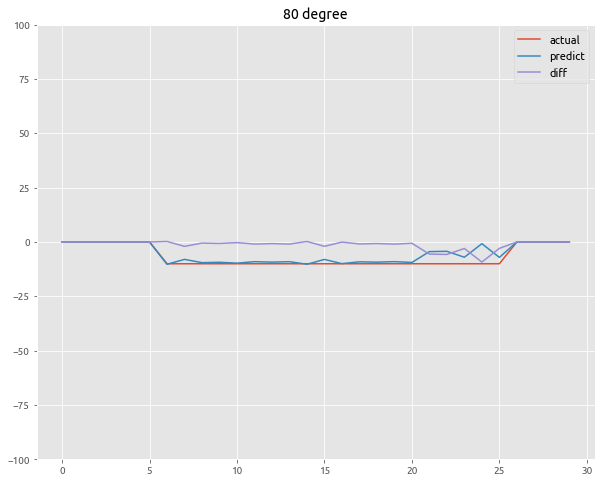

RMSE: 2.4513030312479973 


fftfilter
9.208508000003349
gamma total
11.923297000001185
coch1
3.40919600000052
coch2
3.505422999995062
get avg
0.10132699999667238
fftfilter
9.72697099999641
gamma total
12.349135999997088
coch1
3.4104980000047362
coch2
3.5253049999955692
get avg
0.07418200000392972


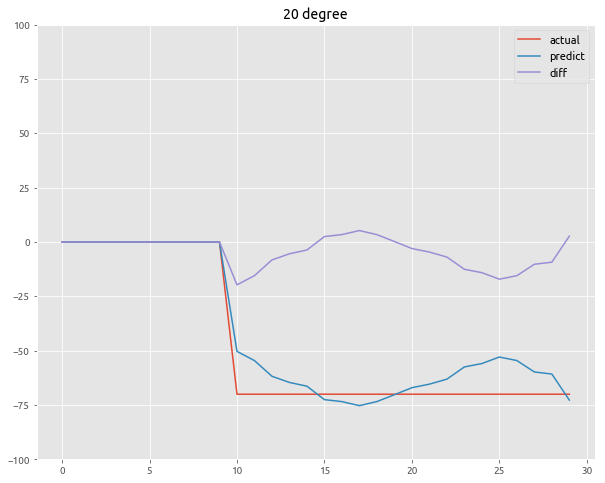

RMSE: 8.082416108035225 


fftfilter
51.206529000002774
gamma total
58.92454100000032
coch1
4.937967999998364
coch2
5.370935999999347
get avg
2.443335999996634
fftfilter
47.50954600000114
gamma total
55.28283600000577
coch1
4.590264999998908
coch2
5.399073000000499
get avg
2.45349300000089


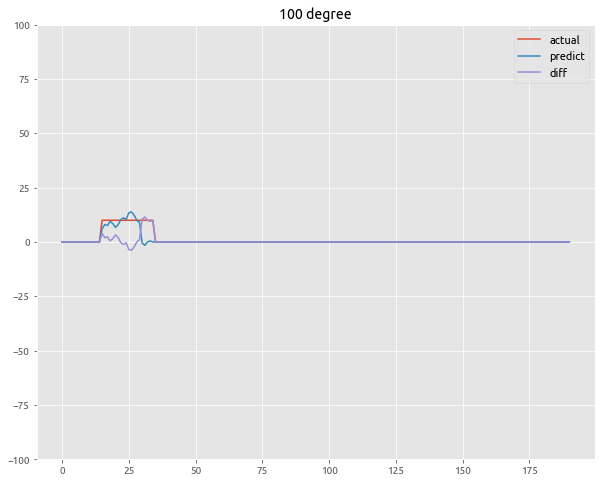

RMSE: 26.069718601867255 


fftfilter
9.724172000002
gamma total
12.449483999997028
coch1
3.336529000000155
coch2
3.473471999997855
get avg
0.08025199999974575
fftfilter
9.490081999996619
gamma total
12.237373000003572
coch1
3.402386999994633
coch2
3.5275390000024345
get avg
0.07456499999534572


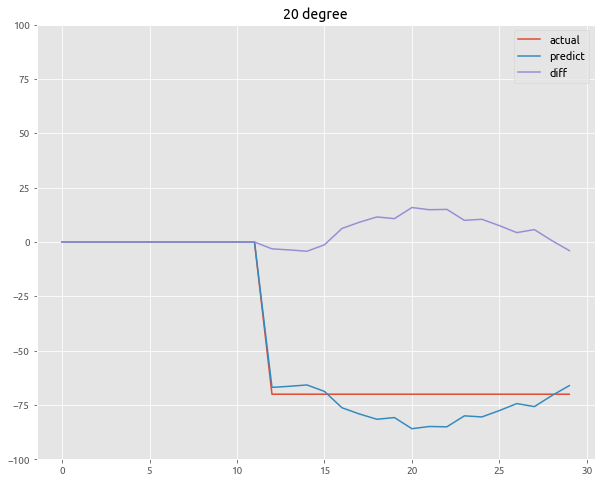

RMSE: 6.932327890749818 


fftfilter
48.78733600000123
gamma total
56.30950300000404
coch1
4.869880999998713
coch2
5.255903999997827
get avg
2.2296990000031656
fftfilter
44.417749000000185
gamma total
51.99644599999738
coch1
4.946609000005992
coch2
5.295834999997169
get avg
2.3441380000003846


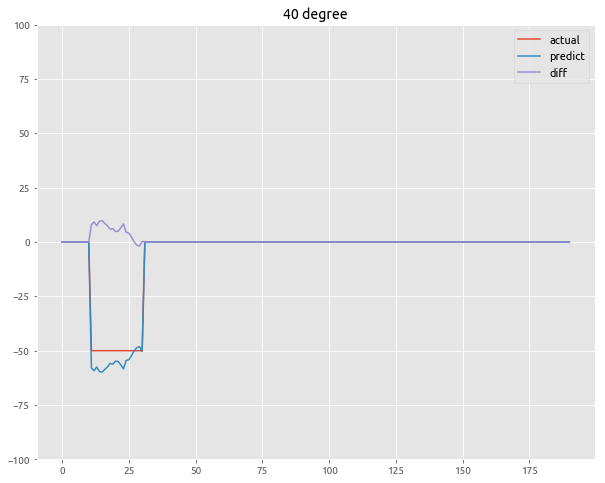

RMSE: 2.049097518140041 


fftfilter
9.239594999999099
gamma total
11.816694000001007
coch1
3.4039110000012442
coch2
3.503117000000202
get avg
0.07445100000040838
fftfilter
10.535848999999871
gamma total
13.132939000002807
coch1
3.392109000000346
coch2
3.5162969999946654
get avg
0.07364500000403496


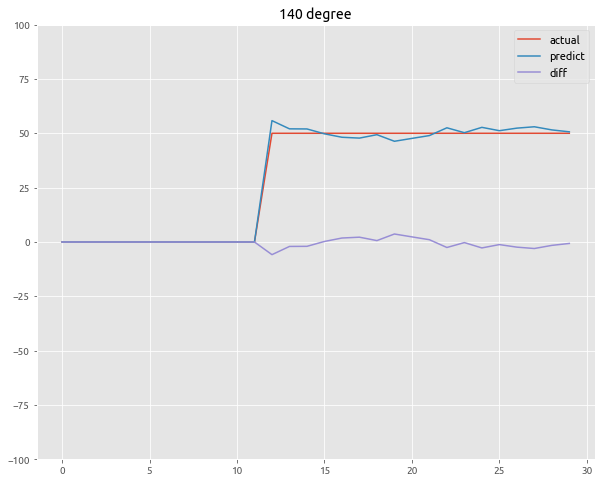

RMSE: 1.858501544975532 


fftfilter
9.257249000002048
gamma total
11.833840999999666
coch1
3.3653249999988475
coch2
3.4810030000007828
get avg
0.07510199999524048
fftfilter
9.2804049999977
gamma total
11.83969700000307
coch1
3.4134789999952773
coch2
3.4813219999996363
get avg
0.0760840000002645


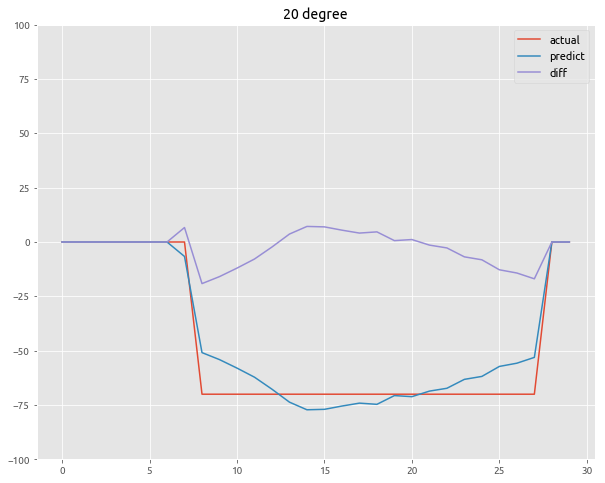

RMSE: 33.75854159797711 


fftfilter
8.80833100000018
gamma total
11.476406000001589
coch1
3.394808999997622
coch2
3.510561000002781
get avg
0.07592000000295229
fftfilter
9.036376999996719
gamma total
11.746940000004543
coch1
3.386140999995405
coch2
3.506092000003264
get avg
0.07330500000534812


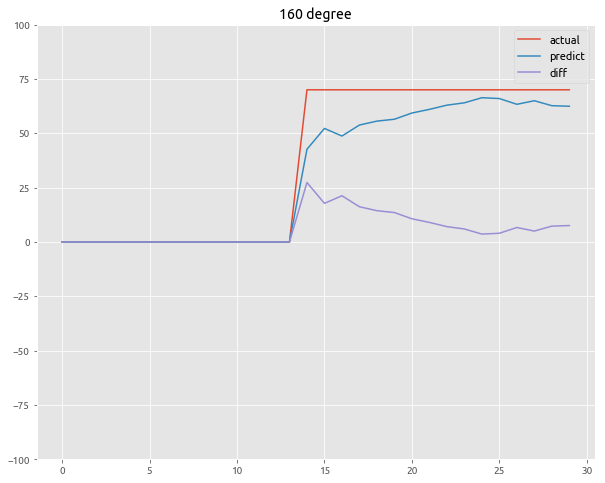

RMSE: 9.417486795039785 


fftfilter
9.457461000005424
gamma total
12.237295999999333
coch1
3.4145600000047125
coch2
3.5267909999965923
get avg
0.08002599999599624
fftfilter
10.08555499999784
gamma total
12.724136999997427
coch1
3.421728000001167
coch2
3.5185070000006817
get avg
0.07434700000158045


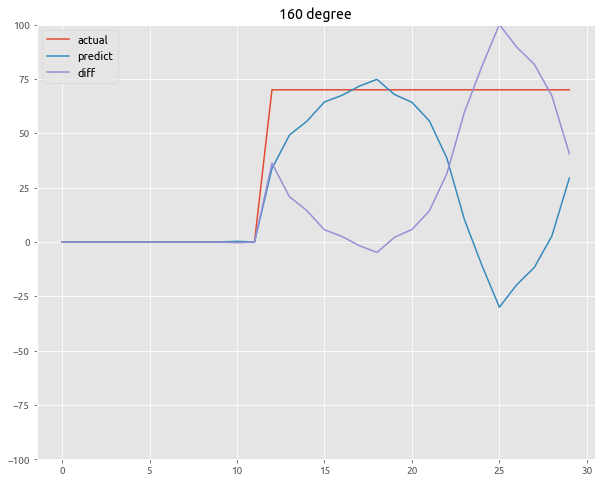

RMSE: 38.37912830273434 


fftfilter
50.224897000000055
gamma total
57.75485199999821
coch1
4.871060999998008
coch2
5.379006000002846
get avg
2.228320000001986
fftfilter
45.52066399999603
gamma total
53.015919999998005
coch1
4.89737900000182
coch2
5.420028000000457
get avg
2.439769000004162


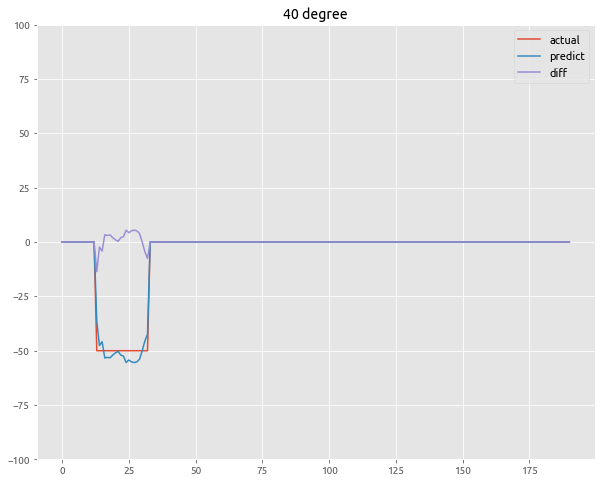

RMSE: 1.5814806078758752 


fftfilter
43.860171000000264
gamma total
51.37669099999766
coch1
4.992442000002484
coch2
5.38906699999643
get avg
2.439723999996204
fftfilter
49.69287699999404
gamma total
57.38890199999878
coch1
4.907660999997461
coch2
5.396678999997675
get avg
2.221396000000823


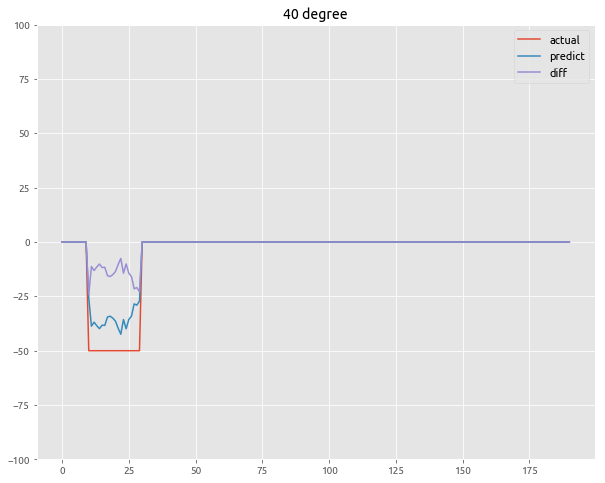

RMSE: 4.934319551176528 


fftfilter
9.818782999995165
gamma total
12.51412999999593
coch1
3.4080180000019027
coch2
3.5500210000027437
get avg
0.07977100000425708
fftfilter
9.70272699999623
gamma total
12.337246999995841
coch1
3.3642260000051465
coch2
3.4624709999989136
get avg
0.07314800000312971


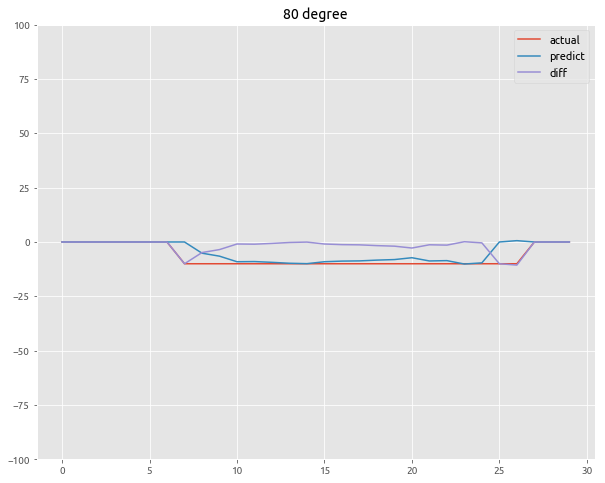

RMSE: 46.5332387061058 


fftfilter
8.830746999999974
gamma total
11.525219000002835
coch1
3.415181999997003
coch2
3.494029000001319
get avg
0.07439700000395533
fftfilter
8.398228000005474
gamma total
11.0013489999983
coch1
3.3856660000019474
coch2
3.4842229999994743
get avg
0.07476799999858486


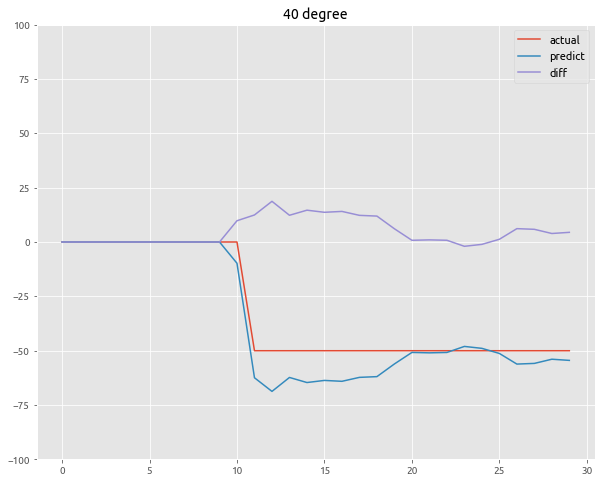

RMSE: 33.71413136468306 


fftfilter
9.190284000003885
gamma total
11.843677999997453
coch1
3.402490000000398
coch2
3.534505999996327
get avg
0.10637000000133412
fftfilter
10.39215599999443
gamma total
13.122723000000406
coch1
3.3428209999983665
coch2
3.415924000000814
get avg
0.07524899999407353


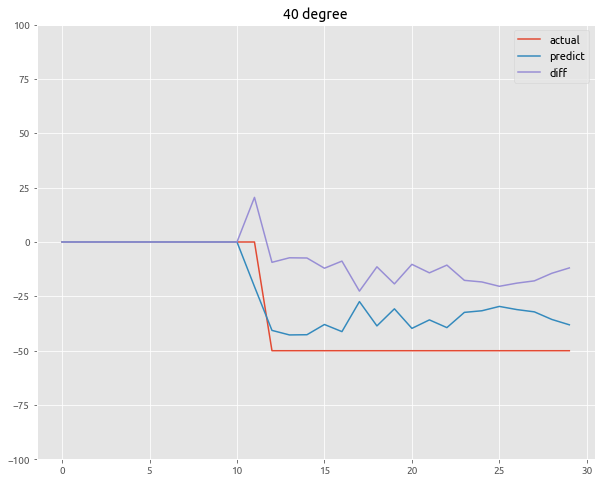

RMSE: 34.80331321020226 


fftfilter
46.88682400000107
gamma total
54.51547999999457
coch1
4.816753000006429
coch2
5.49156899999798
get avg
2.215424999994866
fftfilter
45.46794200000295
gamma total
52.91678599999432
coch1
4.899534000003769
coch2
5.399242999999842
get avg
2.3087390000000596


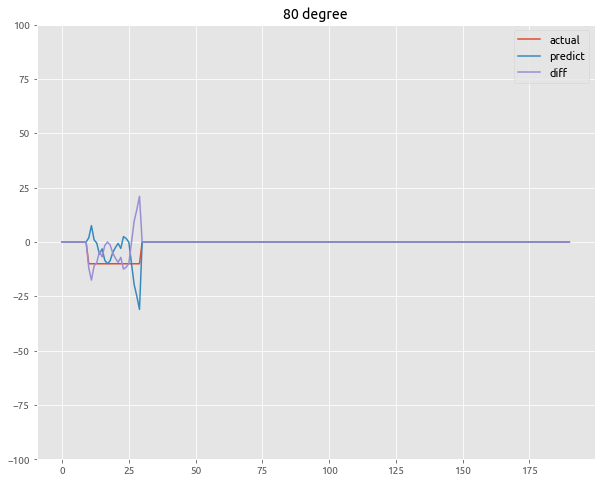

RMSE: 13.421304968384204 


fftfilter
8.910849000007147
gamma total
11.594681999995373
coch1
3.4084970000039903
coch2
3.4989109999951324
get avg
0.07457199999771547
fftfilter
8.439260999999533
gamma total
11.094794999997248
coch1
3.4027270000005956
coch2
3.5186070000054315
get avg
0.07411000000138301


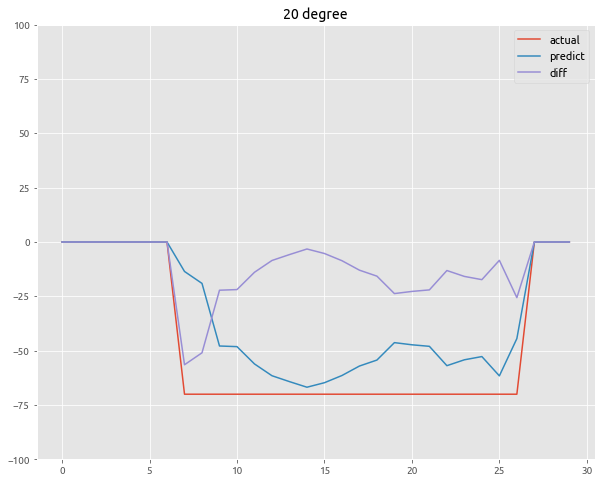

RMSE: 18.790323984502336 


fftfilter
47.08459800000128
gamma total
54.58950300000288
coch1
4.923326999996789
coch2
5.48364600000059
get avg
2.3378889999949024
fftfilter
46.24703299999965
gamma total
53.76535100000183
coch1
4.891428000002634
coch2
5.38919299999543
get avg
2.221315999995568


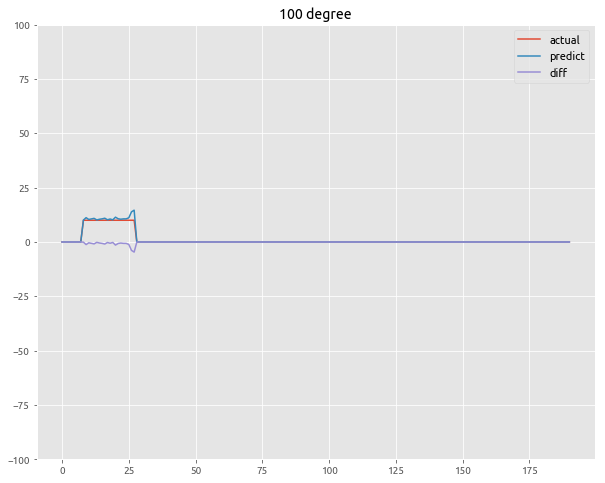

RMSE: 0.4899698779836332 


fftfilter
6.366683000000194
gamma total
8.549095000002126
coch1
3.1669519999995828
coch2
3.374934999999823
get avg
0.03089400000317255
fftfilter
6.110306000002311
gamma total
8.271109000001161
coch1
3.3158819999953266
coch2
3.362068000002182
get avg
0.028207999996084254


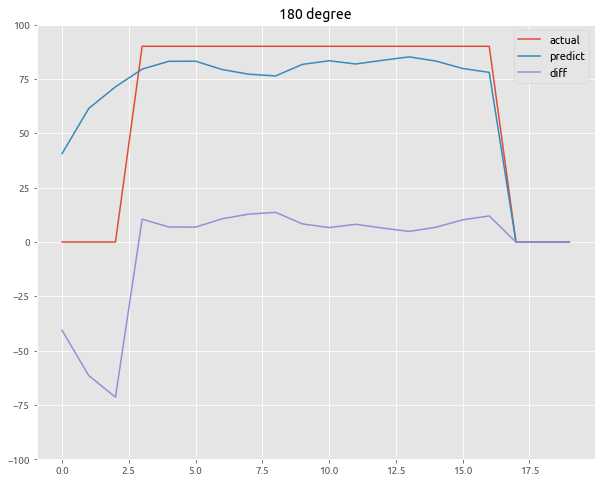

RMSE: 70.14553601443724 


fftfilter
8.222340000000258
gamma total
10.814556999997876
coch1
3.3878830000030575
coch2
3.5139969999945606
get avg
0.07401899999968009
fftfilter
8.872960000000603
gamma total
11.562932000000728
coch1
3.336431999996421
coch2
3.449052000003576
get avg
0.07439200000226265


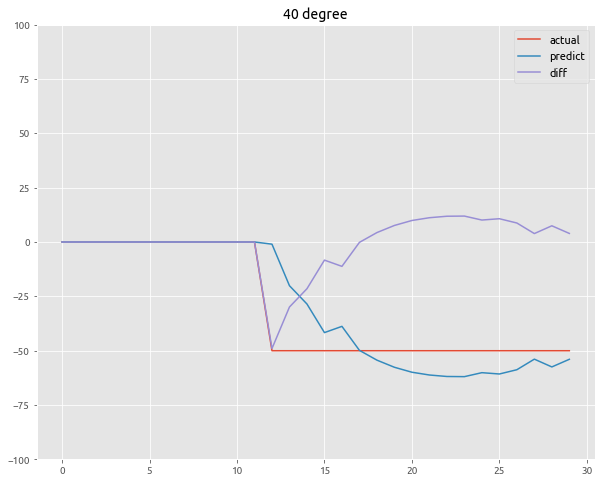

RMSE: 34.11326947275381 


fftfilter
45.31545100000221
gamma total
52.76616500000091
coch1
4.875470999999379
coch2
5.408546999999089
get avg
2.426519999993616
fftfilter
45.61760900000081
gamma total
53.07194100000197
coch1
4.881586999996216
coch2
5.370241000004171
get avg
2.227152000006754


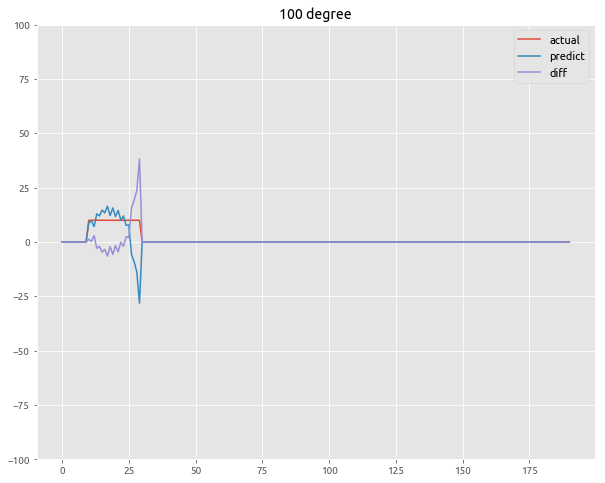

RMSE: 3.830604273135696 


fftfilter
8.540548999997554
gamma total
11.200673999999708
coch1
3.398464999998396
coch2
3.492401000003156
get avg
0.07544100000086473
fftfilter
8.756419999997888
gamma total
11.582289000005403
coch1
3.4004209999984596
coch2
3.4969829999972717
get avg
0.10468199999741046


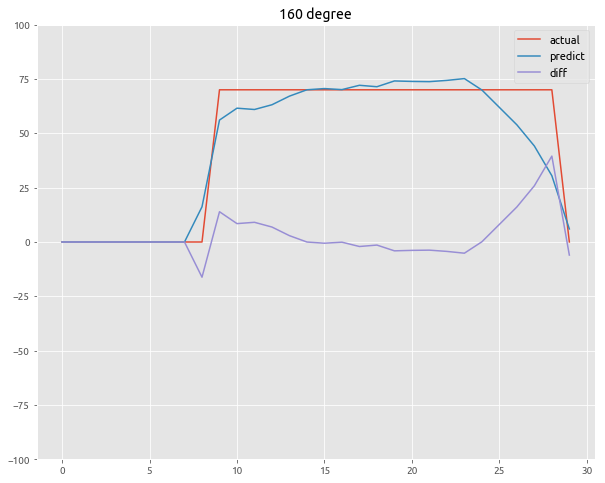

RMSE: 47.55854422855711 


fftfilter
48.37513800000306
gamma total
55.876054000000295
coch1
4.903504000001703
coch2
5.264148999995086
get avg
2.463953999998921
fftfilter
46.78483899999992
gamma total
54.47504200000549
coch1
4.845753999994486
coch2
5.386101000003691
get avg
2.2142769999991287


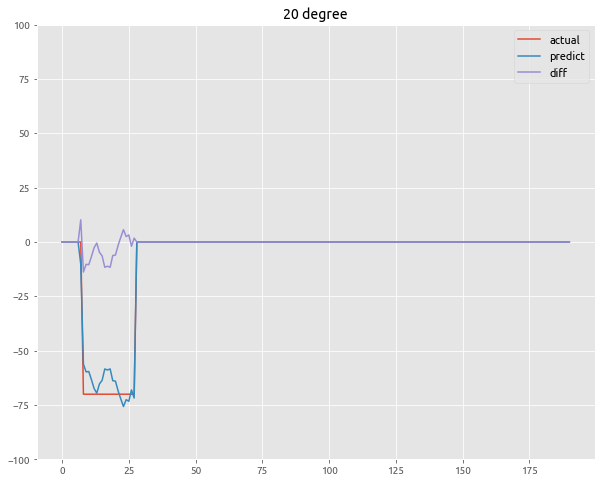

RMSE: 13.234124074438832 


fftfilter
3.9532669999971404
gamma total
4.864966000001004
coch1
1.7410880000024918
coch2
2.3517199999987497
get avg
0.3663629999937257
fftfilter
4.069133999997575
gamma total
4.9826929999981076
coch1
2.3928589999995893
coch2
2.550627999997232
get avg
0.3711929999990389


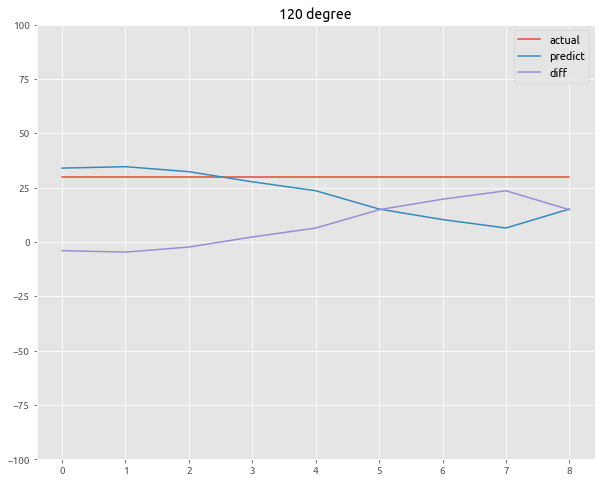

RMSE: 12.79202 


fftfilter
9.04049600000144
gamma total
11.770454999998037
coch1
3.4107740000035847
coch2
3.538774000000558
get avg
0.0754640000013751
fftfilter
8.858844000002136
gamma total
11.494322999998985
coch1
3.4071269999985816
coch2
3.465574000001652
get avg
0.07422099999530474


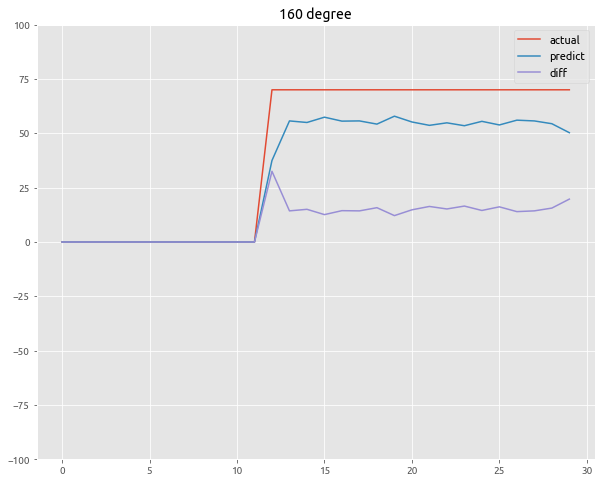

RMSE: 12.84585432328182 


fftfilter
43.864746999999625
gamma total
51.525831999999355
coch1
4.895763000000443
coch2
5.506294999999227
get avg
2.235450000000128
fftfilter
42.14117800000531
gamma total
49.728548999999475
coch1
4.92463900000439
coch2
5.323397000000114
get avg
2.434255000000121


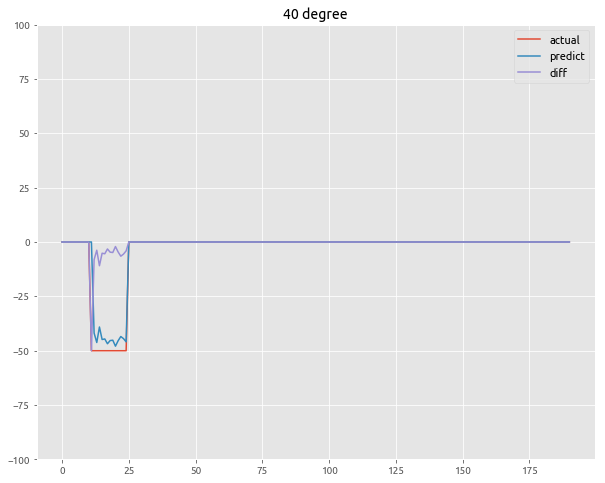

RMSE: 13.10979289660297 


fftfilter
8.949266000003263
gamma total
11.535636000000522
coch1
3.398771999993187
coch2
3.5066380000062054
get avg
0.07361600000149338
fftfilter
9.552931000005628
gamma total
12.151763999994728
coch1
3.4190579999994952
coch2
3.4614290000026813
get avg
0.07430699999531498


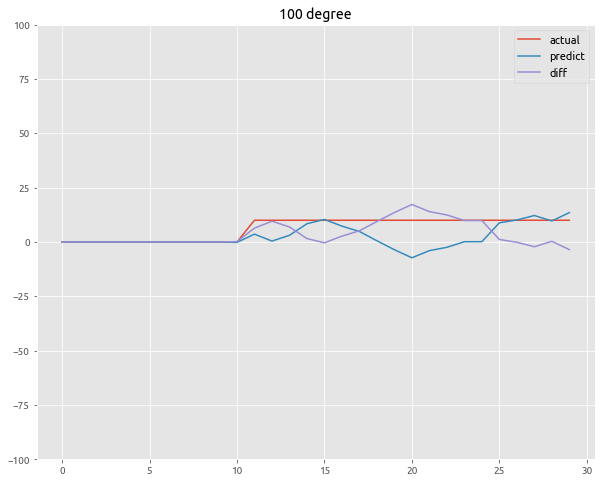

RMSE: 65.97353123392098 


fftfilter
41.54898500000127
gamma total
49.11708099999669
coch1
4.904146000000765
coch2
5.417113000003155
get avg
2.22631900000124
fftfilter
41.18495499999699
gamma total
48.71922700000141
coch1
4.9167989999987185
coch2
5.4048449999972945
get avg
2.2286430000021937


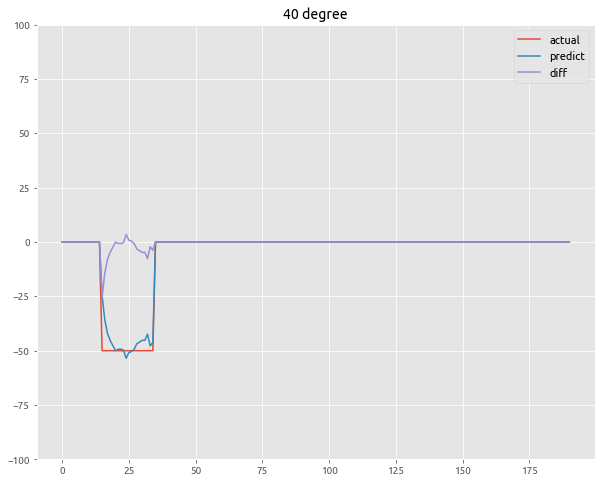

RMSE: 2.405772144386651 


fftfilter
42.09998099999939
gamma total
49.65741800000251
coch1
4.8960189999997965
coch2
5.346607999999833
get avg
2.267927000000782
fftfilter
40.22336599999835
gamma total
47.721363999997266
coch1
4.913412000001699
coch2
5.51687800000218
get avg
2.2224159999968833


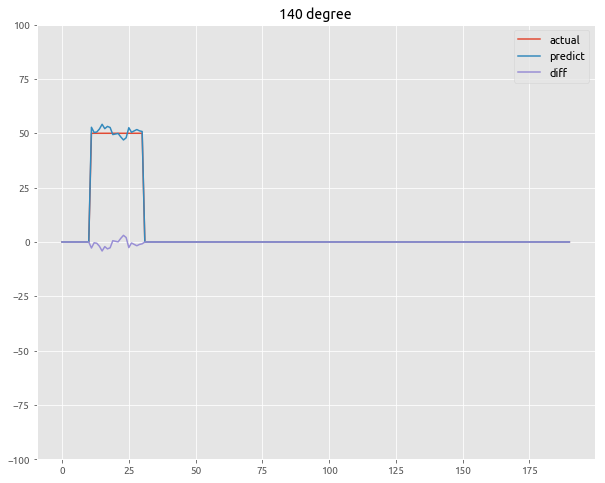

RMSE: 0.6496783557343118 


fftfilter
39.77152599999681
gamma total
47.29894200000126
coch1
4.909209999997984
coch2
5.484934000000067
get avg
2.2439610000001267
fftfilter
39.749909999998636
gamma total
47.19686299999739
coch1
4.888483000002452
coch2
5.364157999996678
get avg
2.3817920000001322


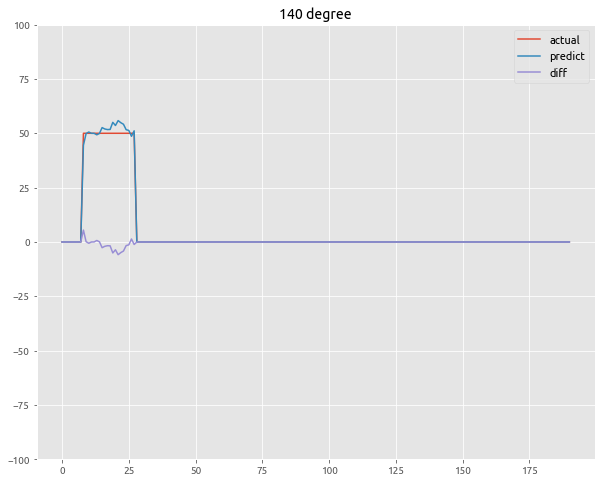

RMSE: 0.9389817357014779 


fftfilter
8.94173800000135
gamma total
11.513823000001139
coch1
3.4235459999981686
coch2
3.544051999997464
get avg
0.07611299999553012
fftfilter
8.552747999994608
gamma total
11.200360000002547
coch1
3.4049139999988256
coch2
3.465447000002314
get avg
0.07499899999675108


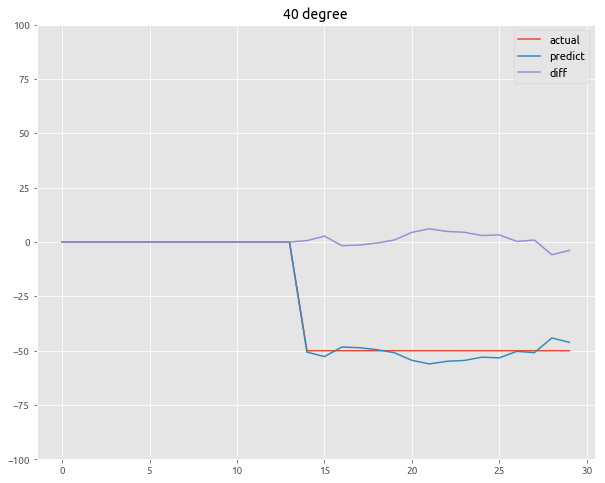

RMSE: 2.471770002419271 


fftfilter
8.06489000000147
gamma total
10.652662000000419
coch1
3.3771820000038133
coch2
3.486834999996063
get avg
0.07606899999518646
fftfilter
8.581707000004826
gamma total
11.15073300000222
coch1
3.3751379999957862
coch2
3.483172000000195
get avg
0.07409900000493508


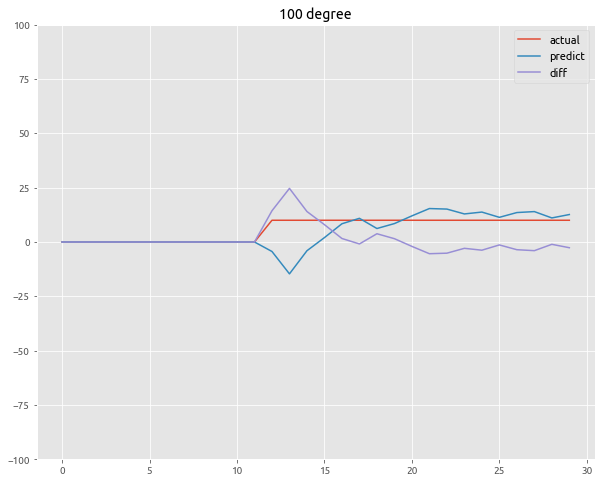

RMSE: 6.363059778043615 


fftfilter
8.55059600000095
gamma total
11.152274000000034
coch1
3.4146159999945667
coch2
3.537145000002056
get avg
0.08086300000286428
fftfilter
9.121160000002419
gamma total
11.85532499999681
coch1
3.414358000001812
coch2
3.50996799999848
get avg
0.07471600000280887


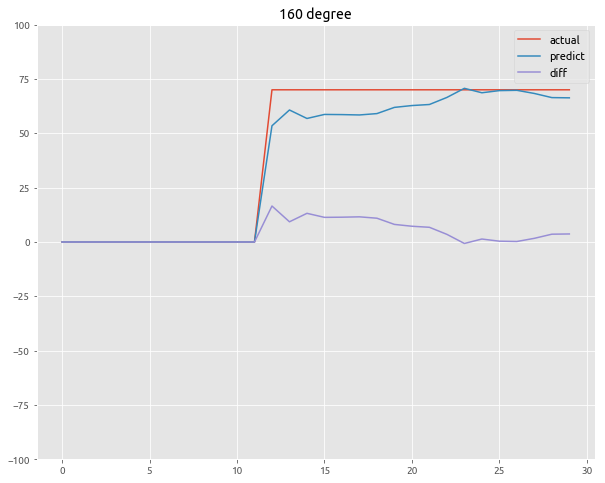

RMSE: 6.4664219847321585 


fftfilter
42.32815199999459
gamma total
49.96843100000115
coch1
4.940168000000995
coch2
5.278577999997651
get avg
2.228275000001304
fftfilter
39.65903799999796
gamma total
47.38958899999852
coch1
4.906124000001
coch2
5.188538999995217
get avg
2.2801970000000438


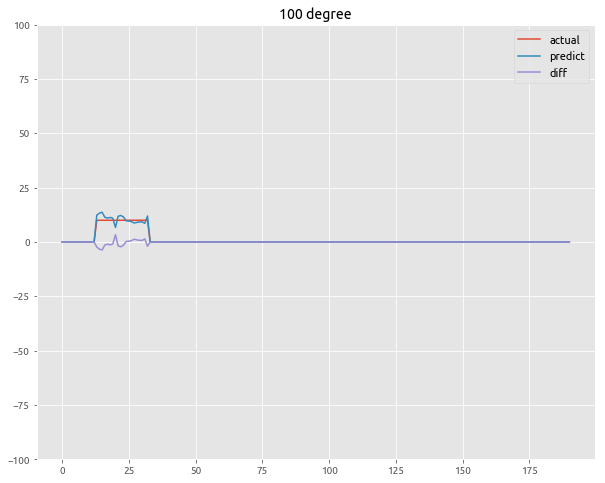

RMSE: 0.592433541406736 


fftfilter
8.540392999995674
gamma total
11.133435000003374
coch1
3.409812999998394
coch2
3.5347079999992275
get avg
0.08126500000071246
fftfilter
9.254786999998032
gamma total
11.908541999997396
coch1
3.4151050000000396
coch2
3.535645999996632
get avg
0.07484000000113156


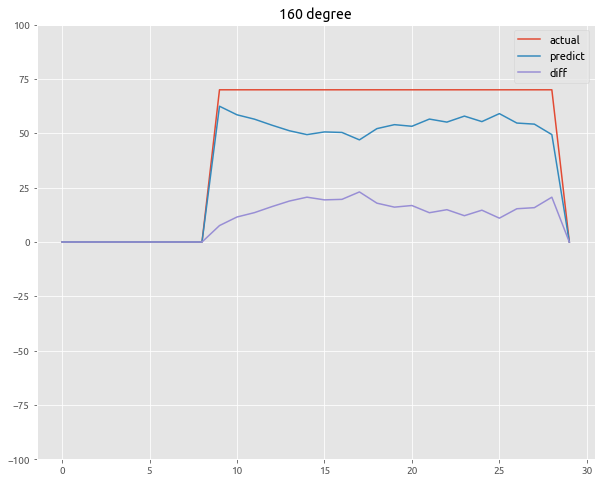

RMSE: 13.361620441455468 


fftfilter
8.400010999997903
gamma total
10.994099000003189
coch1
3.393200999998953
coch2
3.5106940000041504
get avg
0.07465200000297045
fftfilter
8.26357999999891
gamma total
10.835916999996698
coch1
3.3972260000009555
coch2
3.506442000005336
get avg
0.07480299999588169


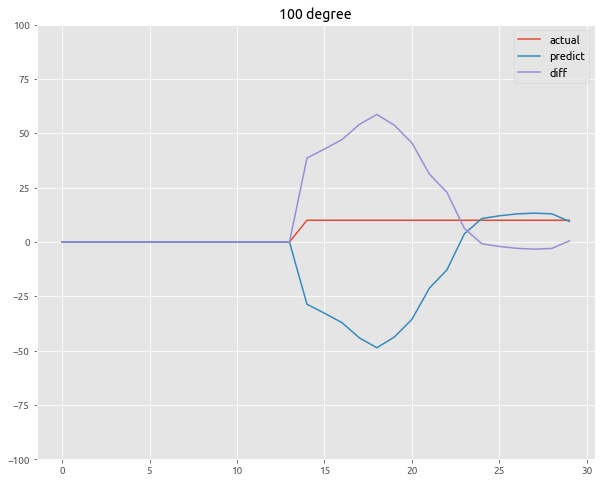

RMSE: 24.784283626099857 


fftfilter
43.0912110000063
gamma total
50.707525999998325
coch1
4.7946609999999055
coch2
5.364985000000161
get avg
2.441697000002023
fftfilter
42.11155499999586
gamma total
49.62659800000256
coch1
4.960300999999163
coch2
5.198151000004145
get avg
2.2364379999999073


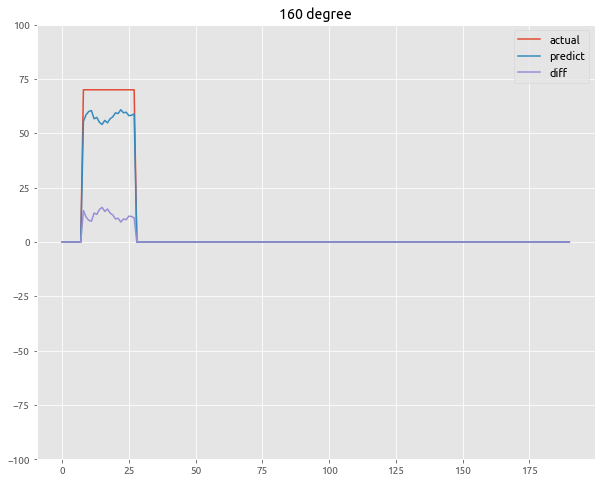

RMSE: 3.9924350625935108 


fftfilter
9.074186999998346
gamma total
11.628852000001643
coch1
3.391474999996717
coch2
3.519658999997773
get avg
0.07512599999608938
fftfilter
8.56906799999706
gamma total
11.153551000003063
coch1
3.397807000001194
coch2
3.533636000000115
get avg
0.0746110000036424


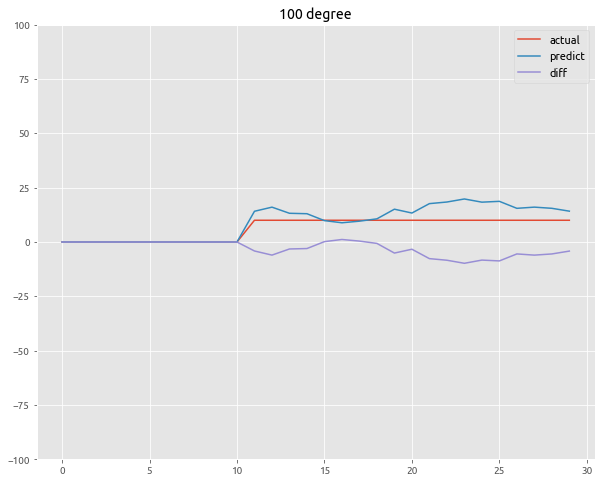

RMSE: 4.455051880075131 


fftfilter
8.788088000001153
gamma total
11.343405999999959
coch1
3.4011570000002393
coch2
3.526732999998785
get avg
0.07484800000383984
fftfilter
8.563861999995424
gamma total
11.146532999999181
coch1
3.3950499999991735
coch2
3.5247030000027735
get avg
0.07593500000075437


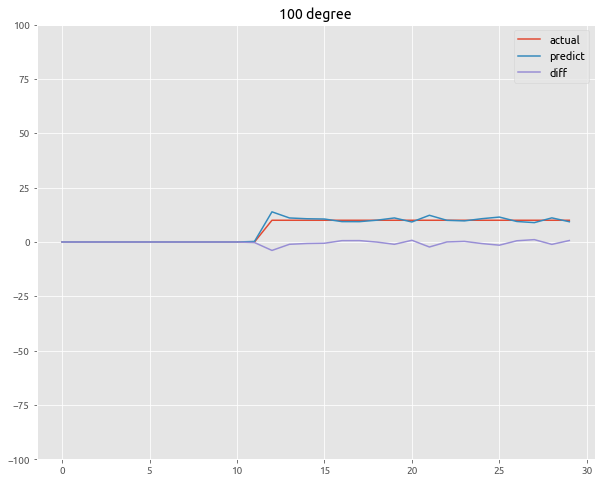

RMSE: 1.0124875432709295 


fftfilter
40.364255999993475
gamma total
47.80941199999506
coch1
4.928920000005746
coch2
5.313461999998253
get avg
2.285979000000225
fftfilter
39.51413200000388
gamma total
46.960777000000235
coch1
4.981582000000344
coch2
5.304613000000245
get avg
2.292220000002999


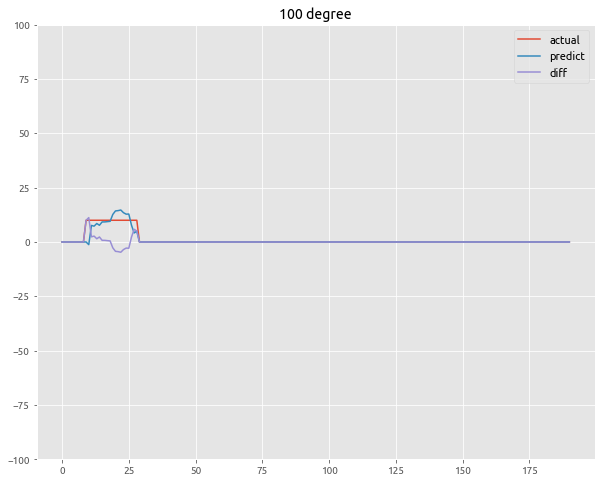

RMSE: 13.086176019031983 


fftfilter
8.341466999998374
gamma total
10.888513000005332
coch1
3.3890009999959148
coch2
3.5071140000000014
get avg
0.07616099999722792
fftfilter
8.162570000000414
gamma total
10.707561000002897
coch1
3.398019000000204
coch2
3.511714000000211
get avg
0.07490099999995437


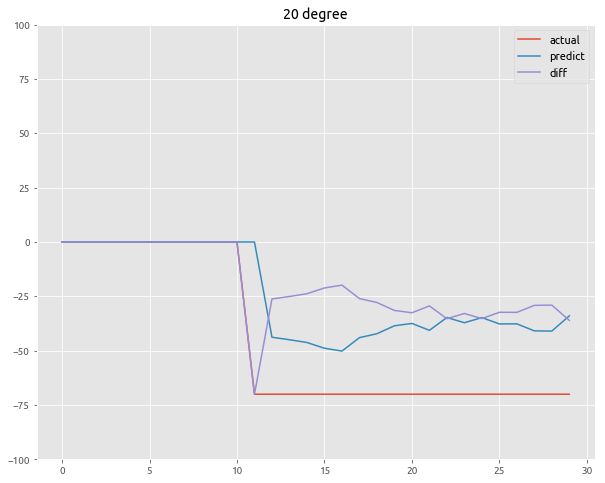

RMSE: 40.05592579274511 


fftfilter
44.707797000002756
gamma total
52.29570099999546
coch1
4.9870000000009895
coch2
5.310563999999431
get avg
2.2325400000045192
fftfilter
38.8797029999987
gamma total
46.35716899999534
coch1
4.921565000004193
coch2
5.392136999995273
get avg
2.419635999998718


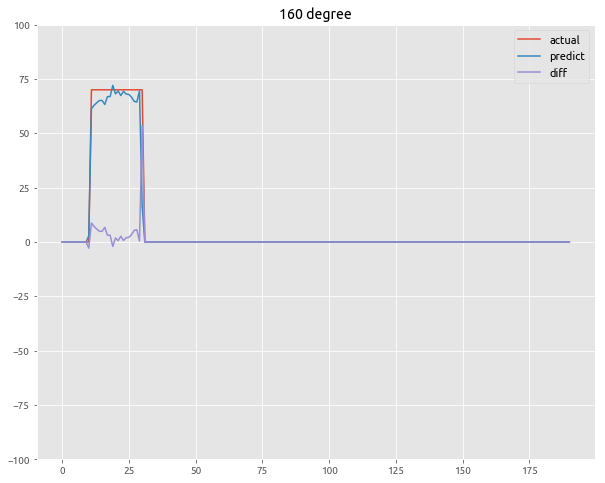

RMSE: 13.661154639050304 


fftfilter
8.347359999999753
gamma total
11.079121000002488
coch1
3.4118230000021867
coch2
3.55347299999994
get avg
0.08284100000309991
fftfilter
8.453335999998671
gamma total
11.067423000000417
coch1
3.406579000002239
coch2
3.5230179999998654
get avg
0.07669299999543


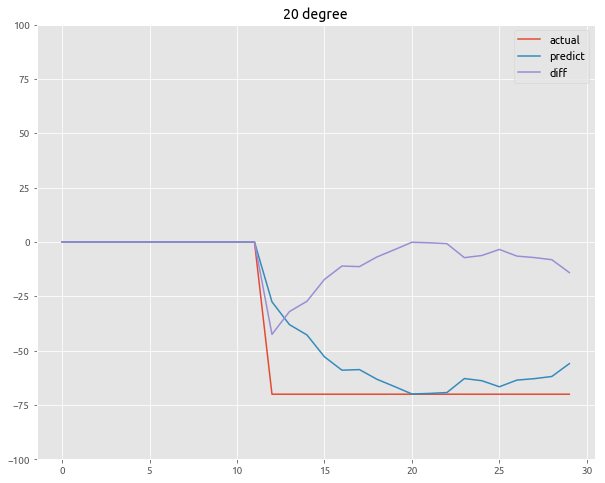

RMSE: 12.434303168406684 


fftfilter
9.024469000003592
gamma total
11.576012000004994
coch1
3.3690309999947203
coch2
3.485087000000931
get avg
0.07556599999952596
fftfilter
8.257587000000058
gamma total
10.827903999997943
coch1
3.380888000006962
coch2
3.5136159999965457
get avg
0.07552299999952083


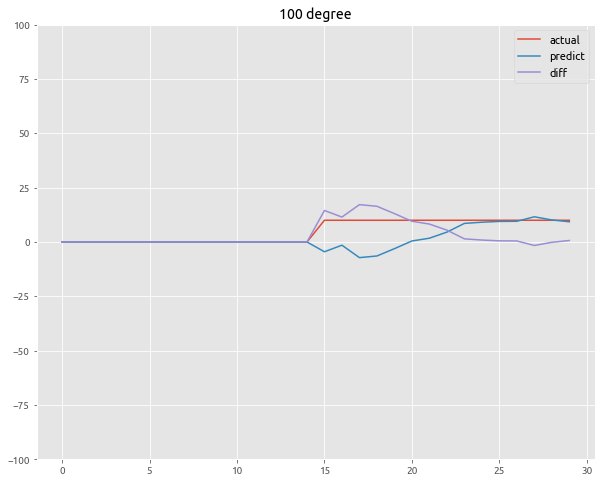

RMSE: 6.513341490233809 


fftfilter
8.924363000005542
gamma total
11.514063999995415
coch1
3.40080900000612
coch2
3.531960000000254
get avg
0.07429899999988265
fftfilter
8.626735999998346
gamma total
11.21455799999967
coch1
3.4163269999990007
coch2
3.5239569999976084
get avg
0.07344200000079582


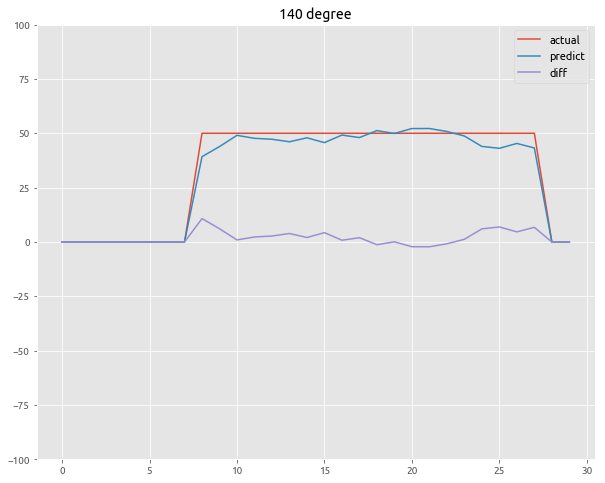

RMSE: 3.5341273995985616 


fftfilter
8.527994000003673
gamma total
11.083161999995355
coch1
3.387288999998418
coch2
3.535157000005711
get avg
0.07855500000005122
fftfilter
8.340773000003537
gamma total
10.8892130000022
coch1
3.4083109999992303
coch2
3.5082629999960773
get avg
0.07569800000055693


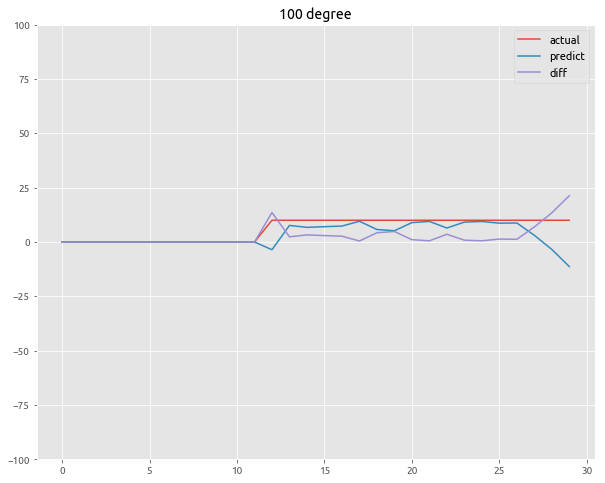

RMSE: 5.653459086348473 


fftfilter
41.845221999996284
gamma total
49.32803899999999
coch1
4.901194999998552
coch2
5.374391999997897
get avg
2.220749000000069
fftfilter
41.03381700000318
gamma total
48.45992299999489
coch1
4.951755000001867
coch2
5.327301000004809
get avg
2.364986000000499


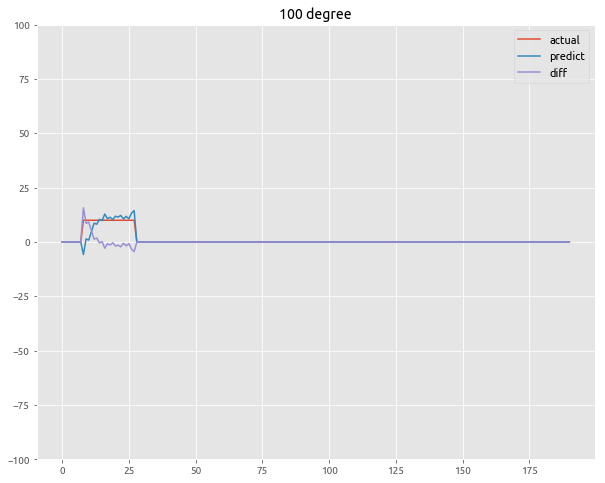

RMSE: 18.466763736466078 


fftfilter
40.43985700000485
gamma total
47.96853199999896
coch1
4.9693330000009155
coch2
5.444737999998324
get avg
2.2150059999985388
fftfilter
39.60746800000197
gamma total
47.18509500000073
coch1
4.96003099999507
coch2
5.311140000005253
get avg
2.2206940000032773


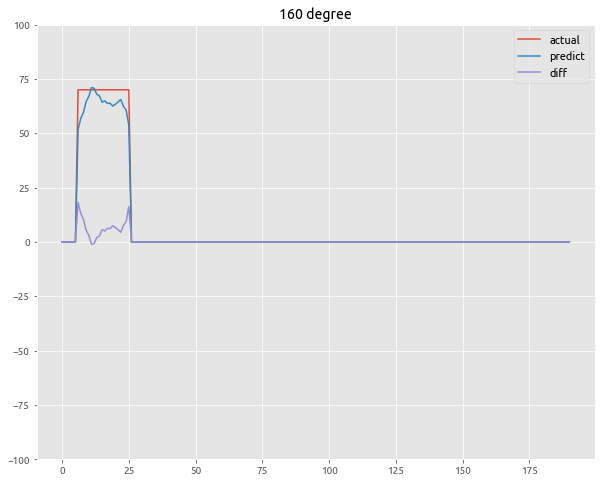

RMSE: 2.675852935344887 


fftfilter
154.13489699999627
gamma total
163.01615499999753
coch1
10.468391000002157
coch2
11.795680999995966
get avg
3.783565000005183
fftfilter
180.5488039999982
gamma total
189.73701299999811
coch1
11.502432000001136
coch2
12.257173999998486
get avg
3.7647959999958402


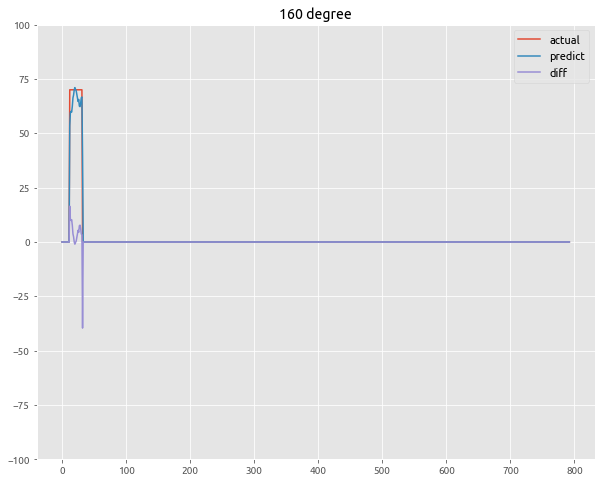

RMSE: 6.481194936474579 


fftfilter
7.989241000002949
gamma total
10.551289000002726
coch1
3.396264999995765
coch2
3.5234960000016144
get avg
0.07441600000311155
fftfilter
7.402436999997008
gamma total
9.9619029999958
coch1
3.3987790000028326
coch2
3.5323740000021644
get avg
0.07486700000299606


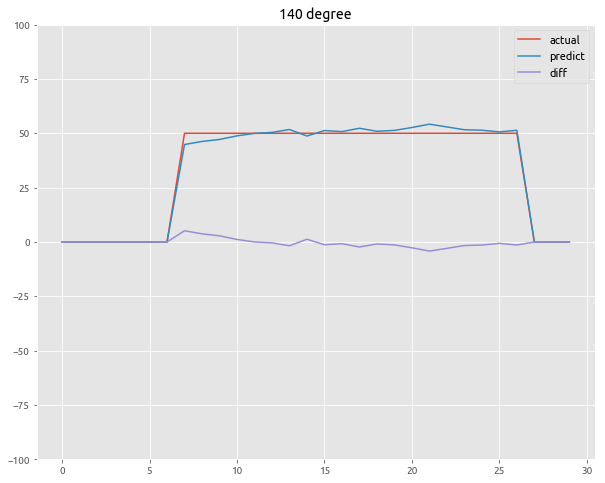

RMSE: 1.8737443877333049 


fftfilter
7.43981299999723
gamma total
10.062505000001693
coch1
3.3902349999989383
coch2
3.5303640000056475
get avg
0.07584399999905145
fftfilter
7.385979000006046
gamma total
9.939970999999787
coch1
3.3954870000015944
coch2
3.53465299999516
get avg
0.0743780000047991


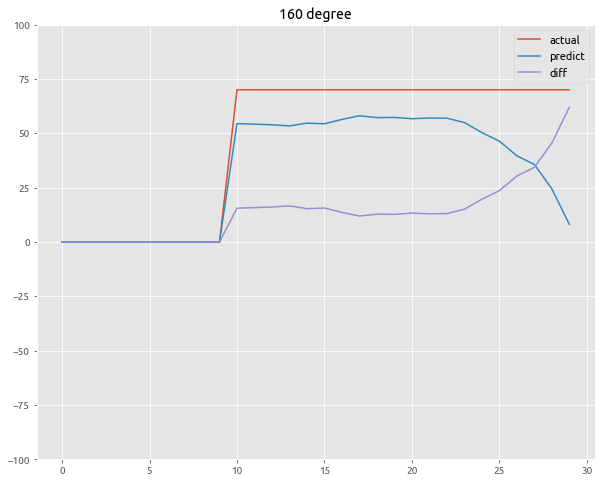

RMSE: 19.87907003443891 


fftfilter
34.939800000000105
gamma total
42.34923600000184
coch1
4.927277999995567
coch2
5.386403000004066
get avg
2.4212009999973816
fftfilter
38.27644000000146
gamma total
46.040108000001055
coch1
4.9033219999982975
coch2
5.359686000003421
get avg
2.27216700000281


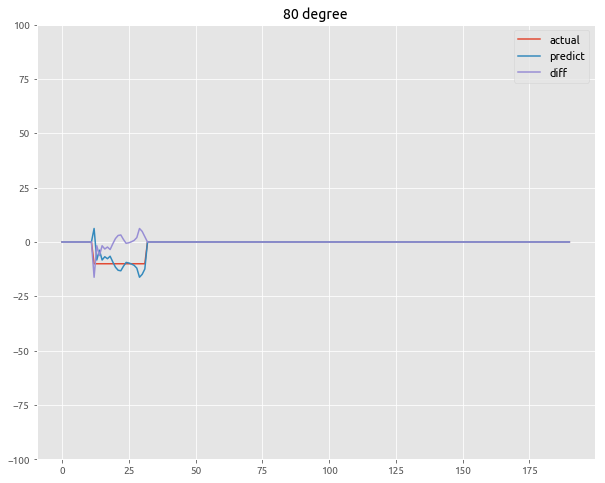

RMSE: 1.5059453570913994 


fftfilter
7.633922000000894
gamma total
10.177309999999125
coch1
3.3914660000009462
coch2
3.4952100000009523
get avg
0.07464600000093924
fftfilter
8.395821999998589
gamma total
10.948121999994328
coch1
3.371725000004517
coch2
3.458954999994603
get avg
0.07528699999966193


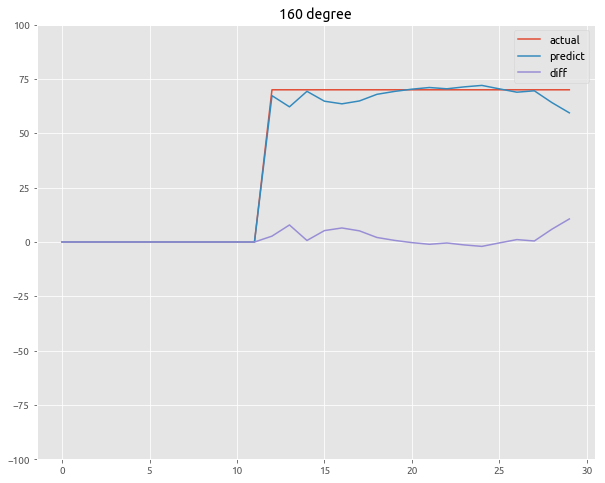

RMSE: 3.292826978341749 


fftfilter
7.47689900000114
gamma total
10.029058000000077
coch1
3.391218000004301
coch2
3.5075379999980214
get avg
0.07423199999902863
fftfilter
7.401127999997698
gamma total
9.965761999999813
coch1
3.392609000002267
coch2
3.49416399999609
get avg
0.07594499999686377


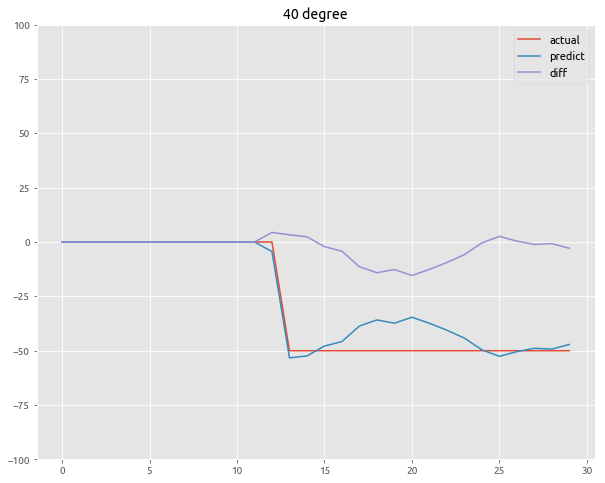

RMSE: 6.013442915240921 


fftfilter
7.450009000000136
gamma total
10.024549999994633
coch1
3.3918240000057267
coch2
3.5055779999966035
get avg
0.07743800000025658
fftfilter
7.3510909999968135
gamma total
9.92250100000092
coch1
3.4029069999960484
coch2
3.508889000004274
get avg
0.07427399999869522


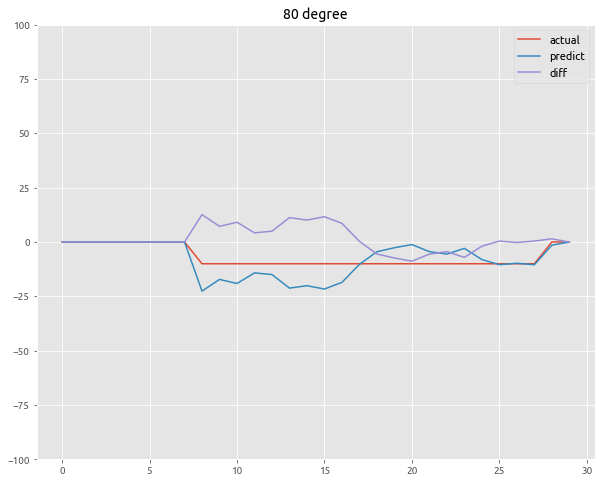

RMSE: 46.829114103970134 


fftfilter
5.209236999995483
gamma total
7.382253999996465
coch1
3.211326000004192
coch2
3.371823999994376
get avg
0.029245999998238403
fftfilter
5.032511999997951
gamma total
7.179897000001802
coch1
3.0665359999984503
coch2
3.3615550000031362
get avg
0.029956999998830725


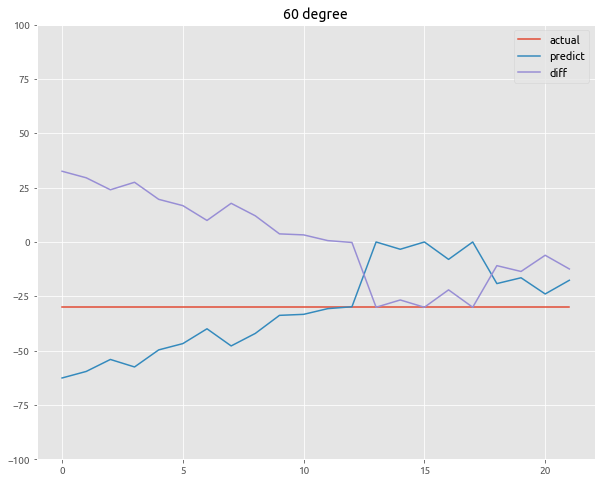

RMSE: 68.5563644281125 


fftfilter
7.344251999995322
gamma total
9.890919999998005
coch1
3.3904099999999744
coch2
3.4979630000016186
get avg
0.07553800000459887
fftfilter
7.312851999995473
gamma total
9.864086000001407
coch1
3.3914799999984098
coch2
3.489462999998068
get avg
0.07484599999588681


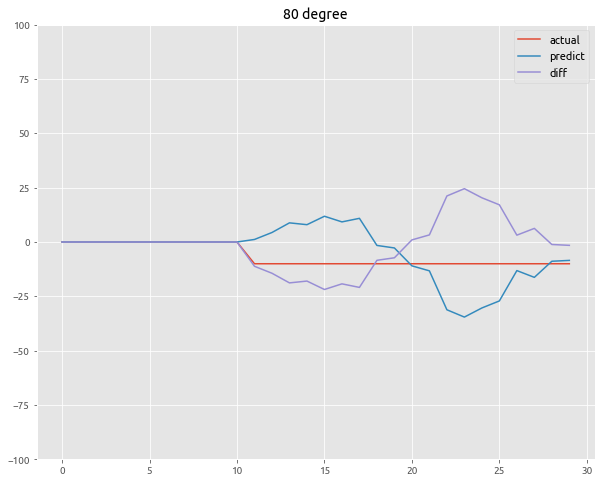

RMSE: 11.8811914389887 


fftfilter
7.2873210000034305
gamma total
9.83666799999628
coch1
3.394958000004408
coch2
3.506502999996883
get avg
0.07582399999955669
fftfilter
7.353580000002694
gamma total
9.915279000000737
coch1
3.3846019999982673
coch2
3.5024950000006356
get avg
0.0746999999973923


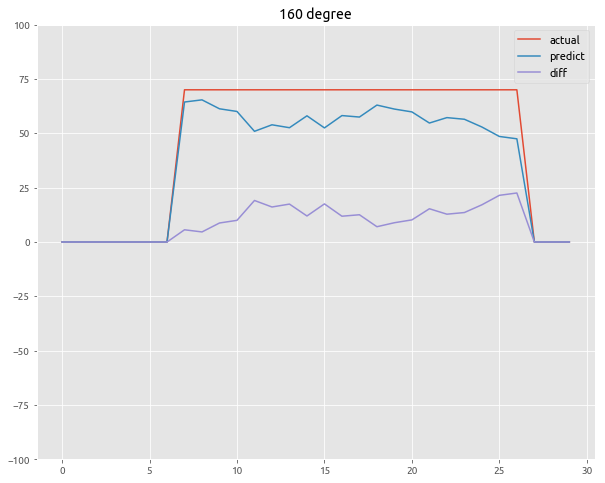

RMSE: 11.515744500840672 


fftfilter
7.310416999993322
gamma total
9.849690000002738
coch1
3.3882850000009057
coch2
3.4852850000024773
get avg
0.07385100000101374
fftfilter
7.681834000002709
gamma total
10.244075999995403
coch1
3.391739000006055
coch2
3.5298709999988205
get avg
0.07547300000442192


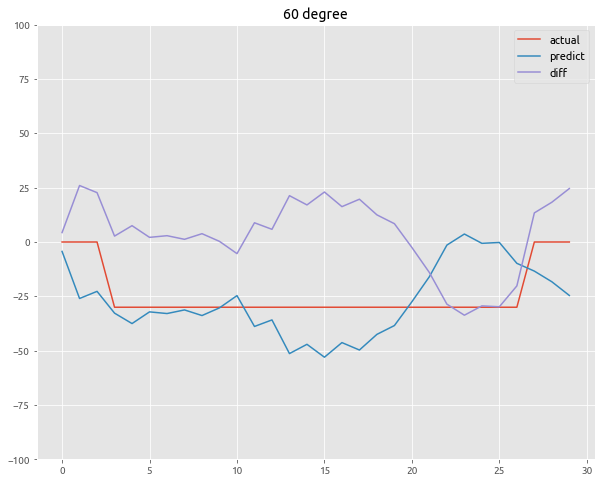

RMSE: 81.71094133803093 


fftfilter
7.398765999998432
gamma total
9.98879300000408
coch1
3.3866029999990133
coch2
3.493532000000414
get avg
0.07398100000136765
fftfilter
7.9265269999959855
gamma total
10.48687599999539
coch1
3.413107000000309
coch2
3.5043770000047516
get avg
0.07494299999962095


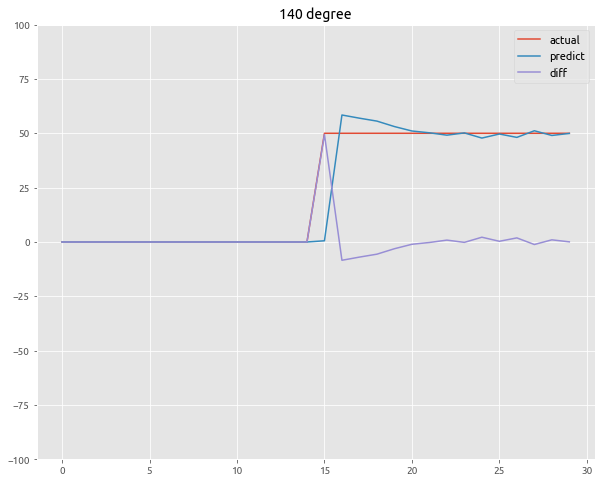

RMSE: 32.9507912397006 


fftfilter
7.488753999998153
gamma total
10.05024499999854
coch1
3.4163360000020475
coch2
3.543893999994907
get avg
0.07266399999934947
fftfilter
7.491584999996121
gamma total
10.036338000005344
coch1
3.400922000000719
coch2
3.5296180000004824
get avg
0.07386299999780022


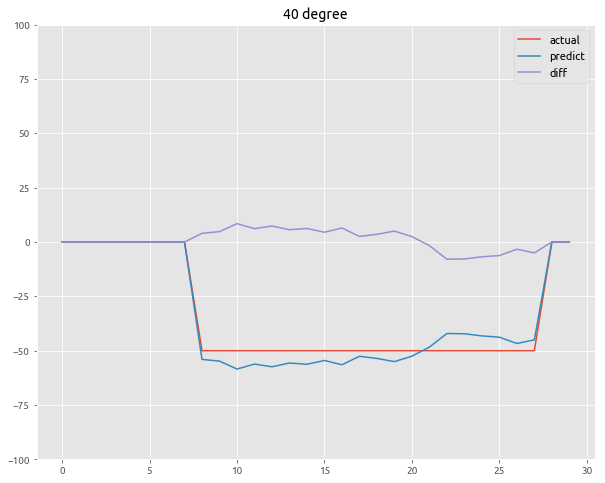

RMSE: 4.59104679842884 


fftfilter
7.8440780000019
gamma total
10.411673000002338
coch1
3.4123879999970086
coch2
3.4891700000007404
get avg
0.07425299999886192
fftfilter
7.9030299999940326
gamma total
10.488826999993762
coch1
3.401335000002291
coch2
3.516795000003185
get avg
0.07577400000445778


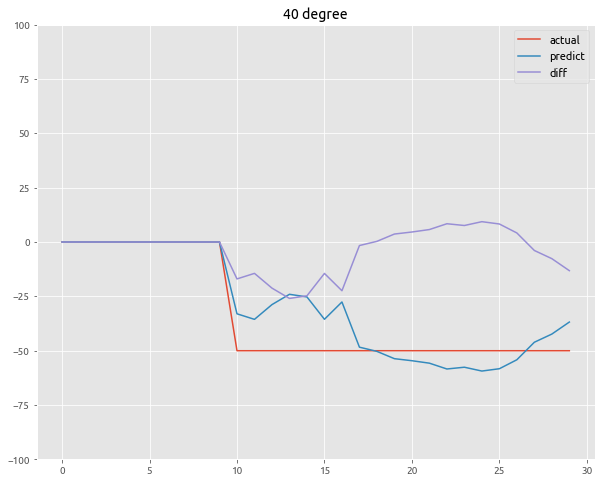

RMSE: 10.896442985653168 


total_rmse: 17.065871642071187


In [103]:
rmse_list = []
k = 0

for i in val_list:
    if(i < 50):
        vad_pred, pred = predict(model, samples[i])
    elif((i >= 50) & (i < n_20)):
        vad_pred, pred = predict(model, samples_20[i - 50])
    elif((i >= n_20) & (i < n_40)):
        vad_pred, pred = predict(model, samples_40[i - n_20])
    elif((i >= n_40) & (i < n_80)):
        vad_pred, pred = predict(model, samples_80[i - n_40])
    elif((i >= n_80) & (i < n_100)):
        vad_pred, pred = predict(model, samples_100[i - n_80])
    elif((i >= n_100) & (i < n_140)):
        vad_pred, pred = predict(model, samples_140[i - n_100])
    elif((i >= n_140) & (i < n_160)):
        vad_pred, pred = predict(model, samples_160[i - n_140])
    error = total_label[i].reshape(-1, 1) - pred
    plt.figure(figsize=(10, 8))
    plt.title('%d degree' %(edge_list[k]))
    plt.plot(range(0, len(total_label[i])), total_label[i], label='actual')
    plt.plot(range(0, len(pred)), pred, label='predict')
    plt.plot(range(0, len(error)), error, label='diff')
    plt.ylim(-100, 100)
    plt.legend()
    plt.show()
        
    for j in range(0, len(error)):
        if((vad_label[i][j] == 0) & (vad_pred[j] != 0) | ((vad_label[i][j] != 0) & (vad_pred[j] == 0))):
            error[j] = 180
    
    rmse = np.sqrt((error ** 2).mean())
    rmse_list.append(rmse)
    print('RMSE:', rmse, '\n\n')
    k = k + 1
    
print('total_rmse:', np.array(rmse_list).mean())

# Classification

In [42]:
total_label = []

for i in range(0, n_160):
    array_label = np.array(label_list[i])
    total_label.append(array_label)

In [ ]:
vad_label = total_label.copy

In [28]:
for i in range(0, 12):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 1

for i in range(12, 25):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 4
            
for i in range(25, 38):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 7
            
for i in range(38, 50):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 10
            
for i in range(50, n_20):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 2

for i in range(n_20, n_40):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 3
            
for i in range(n_40, n_80):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 5
            
for i in range(n_80, n_100):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 6
            
for i in range(n_100, n_140):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 8
            
for i in range(n_140, n_160):
    for j in range(0, len(total_label[i])):
        if(total_label[i][j] == 1):
            total_label[i][j] = 9
              
total_label

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 array([1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
      

In [29]:
X = []
y = []
vad = []

for i in range(0, n_160):
    X.append(total_instances_tensor[idx[i]])
    y.append(total_label[idx[i]])
    vad.append(vad_label[idx[i]])

In [30]:
train_idx = round(n_160 * 0.8)
X_train = np.concatenate(X[:train_idx], axis=0)
y_train = np.concatenate(y[:train_idx], axis=0)
vad_train = np.concatenate(vad[:train_idx], axis=0)

X_train.shape, y_train.shape, vad_train.shape

((781, 768, 100, 2), (781,))

In [31]:
X_val = np.concatenate(X[train_idx: ], axis=0)
y_val = np.concatenate(y[train_idx: ], axis=0)
vad_val = np.concatenate(vad[train_idx: ], axis=0)

X_val.shape, y_val.shape, vad_val.shape

((242, 768, 100, 2), (242,))

In [32]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 11)
y_val = np_utils.to_categorical(y_val, 11)

In [33]:
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dropout, Dense, Reshape, Conv1D
from keras.models import Model

input_spectrogram = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

conv_1 = Conv2D(16, (3, 3), activation='relu')(input_spectrogram)
max_pool_1 = MaxPooling2D((2, 2))(conv_1)

conv_2 = Conv2D(32, (3, 3), activation='relu')(max_pool_1)
max_pool_2 = MaxPooling2D((2, 2))(conv_2)

conv_3 = Conv2D(64, (3, 3), strides=(2,1), activation='relu')(max_pool_2)
conv_3_1 = Conv2D(64, (3, 2), strides=(2,1), activation='relu')(conv_3)
max_pool_3 = MaxPooling2D((3, 2), name='max_pool_3')(conv_3_1)

shape_max_pool_3 = max_pool_3.get_shape().as_list()    # (None, height, width, channel)
print("shape_max_pool_3 : ", shape_max_pool_3)
# reshaped = layers.Reshape((-1, shape_list[1]*shape_list[3]))(max_pool_3)

conv_4 = Conv2D(1024, (shape_max_pool_3[1], 1), padding='valid', activation='relu')(max_pool_3)
shape_conv_4 = conv_4.get_shape().as_list()
print("shape_conv_4 : ", shape_conv_4)

reshaped = Reshape((shape_conv_4[2], shape_conv_4[3]))(conv_4) # reshape to (timesteps, features) explicitly 

conv_5 = Conv1D(512, kernel_size=3, activation='relu')(reshaped)

flatten = Flatten()(conv_5)
# flatten_drop = Dropout(0.3)(flatten)

fc1 = Dense(32, activation='relu')(flatten)
fc1_drop = Dropout(0.1)(fc1)

vad_out = Dense(1, activation='sigmoid')(fc1_drop)
dense_out = Dense(11, activation='softmax')(fc1_drop)

model_clf = Model(inputs=input_spectrogram, outputs=[vad_out, dense_out])
model_clf.summary()

shape_max_pool_3 :  [None, 15, 10, 64]
shape_conv_4 :  [None, 1, 10, 1024]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 768, 100, 2)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 766, 98, 16)       304       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 383, 49, 16)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 381, 47, 32)       4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 190, 23, 32)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 94, 21, 64)        18496     
_________________________________________________________________
c

In [34]:
from keras.utils import multi_gpu_model

model_clf = multi_gpu_model(model_clf, gpus=8, cpu_relocation=True)

In [35]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_clf.compile(optimizer ='adam', loss=['binary_crossentropy', 'categorical_crossentropy'], metrics =['acc', 'acc'])

callbacks_list = [EarlyStopping(monitor='loss', patience=20),
                 ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]

history = model_clf.fit(X_train, [vad_train, y_train],
                    epochs=150, batch_size=64, 
                    callbacks=callbacks_list,
                    validation_data=(X_val, [vad_val, y_val]),
                    shuffle=False)

Train on 781 samples, validate on 242 samples
Epoch 1/150
781/781 [==============================] - 3s 4ms/step - loss: 1.7509 - acc: 0.2420 - val_loss: 1.6114 - val_acc: 0.2397
Epoch 2/150
781/781 [==============================] - 2s 2ms/step - loss: 1.6027 - acc: 0.2471 - val_loss: 1.5803 - val_acc: 0.3636
Epoch 3/150
781/781 [==============================] - 2s 2ms/step - loss: 1.5583 - acc: 0.3099 - val_loss: 1.4678 - val_acc: 0.3884
Epoch 4/150
781/781 [==============================] - 1s 2ms/step - loss: 1.5215 - acc: 0.3009 - val_loss: 1.5108 - val_acc: 0.2851
Epoch 5/150
781/781 [==============================] - 1s 2ms/step - loss: 1.4936 - acc: 0.2881 - val_loss: 1.4104 - val_acc: 0.4215
Epoch 6/150
781/781 [==============================] - 2s 2ms/step - loss: 1.4577 - acc: 0.3367 - val_loss: 1.5430 - val_acc: 0.3182
Epoch 7/150
781/781 [==============================] - 1s 2ms/step - loss: 1.4810 - acc: 0.3496 - val_loss: 1.4030 - val_acc: 0.3182
Epoch 8/150
781/781 [==

Epoch 62/150
781/781 [==============================] - 1s 2ms/step - loss: 0.0343 - acc: 0.9923 - val_loss: 1.4855 - val_acc: 0.7851
Epoch 63/150
781/781 [==============================] - 1s 2ms/step - loss: 0.0290 - acc: 0.9936 - val_loss: 1.4861 - val_acc: 0.7851
Epoch 64/150
781/781 [==============================] - 1s 2ms/step - loss: 0.0300 - acc: 0.9936 - val_loss: 1.4866 - val_acc: 0.7851
Epoch 65/150
781/781 [==============================] - 1s 2ms/step - loss: 0.0375 - acc: 0.9898 - val_loss: 1.4859 - val_acc: 0.7851
Epoch 66/150
781/781 [==============================] - 1s 2ms/step - loss: 0.0415 - acc: 0.9872 - val_loss: 1.4863 - val_acc: 0.7851
Epoch 67/150
781/781 [==============================] - 1s 2ms/step - loss: 0.0366 - acc: 0.9885 - val_loss: 1.4873 - val_acc: 0.7851
Epoch 68/150
781/781 [==============================] - 2s 2ms/step - loss: 0.0354 - acc: 0.9910 - val_loss: 1.4877 - val_acc: 0.7851
Epoch 69/150
781/781 [==============================] - 1s 2ms

In [36]:
def predict(model, file_path):
    mrcg_L, mrcg_R = mrcg_transpose(file_path, sr=44100)
    mrcg_L_stack = generate_instances_no_label(mrcg_L, 100, 10)
    mrcg_R_stack = generate_instances_no_label(mrcg_R, 100, 10)
    X = np.concatenate([mrcg_L_stack, mrcg_R_stack], axis=-1)
    vad_pred, pred = np.argmax(model.predict(X), axis=1)
    return pred

In [ ]:
val_list = idx[train_idx:]
edge_list = []

for i in range(0, len(val_list)):
    val_idx = val_list[i]
    
    if((val_idx >= 0) & (val_idx < 12)):
        edge_list.append(0)
    elif((val_idx >= 12) & (val_idx < 25)):
        edge_list.append(60)
    elif((val_idx >= 25) & (val_idx < 38)):
        edge_list.append(120)
    elif((val_idx >= 38) & (val_idx < 50)):
        edge_list.append(180)
    elif((val_idx >= 50) & (val_idx < n_20)):
        edge_list.append(20)
    elif((val_idx >= n_20) & (val_idx < n_40)):
        edge_list.append(40)
    elif((val_idx >= n_40) & (val_idx < n_80)):
        edge_list.append(80)
    elif((val_idx >= n_80) & (val_idx < n_100)):
        edge_list.append(100)
    elif((val_idx >= n_100) & (val_idx < n_140)):
        edge_list.append(140)
    elif((val_idx >= n_140) & (val_idx < n_160)):
        edge_list.append(160)

len(val_list), len(edge_list)

fftfilter
5.306520999999975
gamma total
7.129069000000072
coch1
2.61152200000015
coch2
3.201068999999734
get avg
0.024499999999989086
fftfilter
5.572591000000102
gamma total
7.40264900000011
coch1
2.603411999999935
coch2
3.2137149999998655
get avg
0.026143000000047323


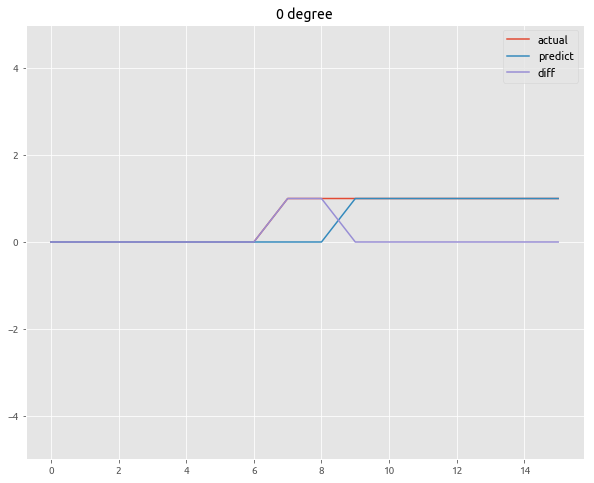

RMSE: 63.63961030678928 


fftfilter
5.118500999999924
gamma total
6.937108999999964
coch1
2.669006999999965
coch2
3.2135840000000826
get avg
0.03901499999983571
fftfilter
5.491958999999952
gamma total
7.4416229999997086
coch1
2.6081240000003163
coch2
3.2135879999996178
get avg
0.03945999999996275


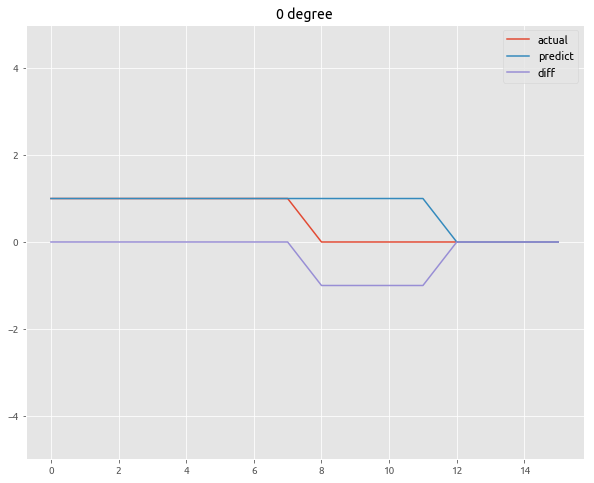

RMSE: 90.0 


fftfilter
8.879953000000114
gamma total
11.326923999999963
coch1
3.305765000000065
coch2
3.3962689999998474
get avg
0.07385900000008405
fftfilter
9.324395000000095
gamma total
11.769283000000087
coch1
3.302926999999727
coch2
3.4350170000002436
get avg
0.07605299999977433


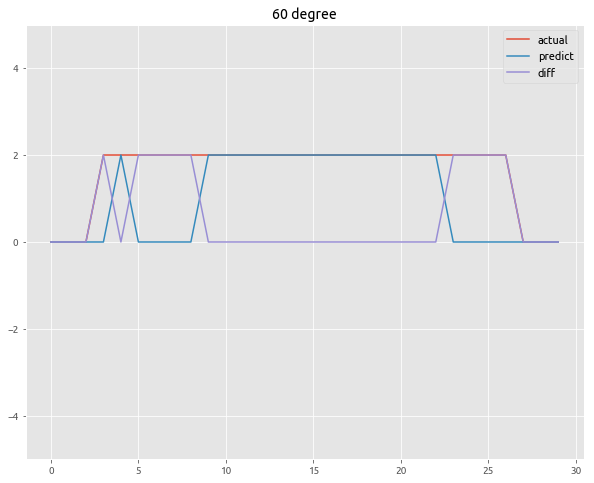

RMSE: 98.5900603509299 


fftfilter
6.954228999999941
gamma total
9.156911000000036
coch1
3.2340800000001764
coch2
3.278111000000081
get avg
0.04506400000036592
fftfilter
6.853837999999996
gamma total
9.070024999999987
coch1
3.2323309999997036
coch2
3.287017999999989
get avg
0.029201000000284694


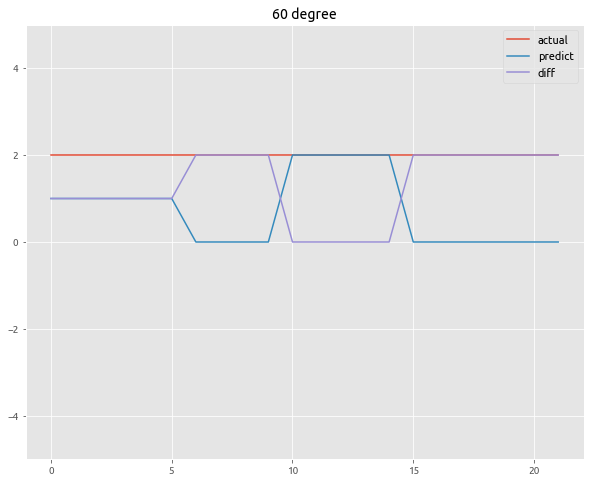

RMSE: 131.07943462579544 


fftfilter
7.786166000000321
gamma total
10.177752999999939
coch1
3.2530980000001364
coch2
3.3409389999997074
get avg
0.06469300000026124
fftfilter
8.268200999999863
gamma total
10.647249999999985
coch1
3.25076799999988
coch2
3.297618000000057
get avg
0.06406700000025012


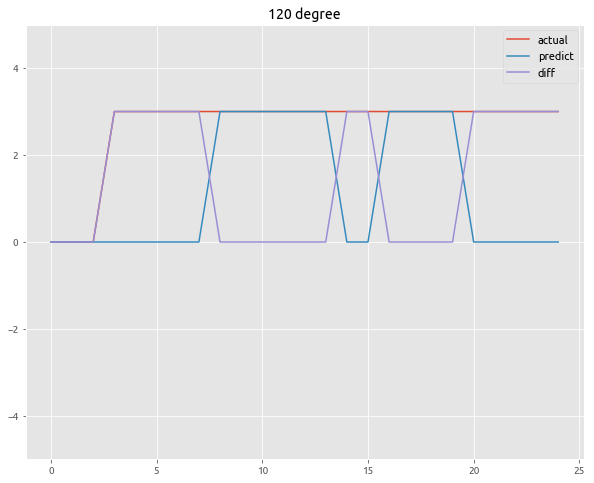

RMSE: 124.70765814495917 


fftfilter
6.697357999999895
gamma total
8.94318099999964
coch1
3.175199000000248
coch2
3.2817879999997785
get avg
0.06051000000024942
fftfilter
7.472609999999804
gamma total
9.744950999999674
coch1
3.2412630000003446
coch2
3.2971489999999903
get avg
0.06098100000008344


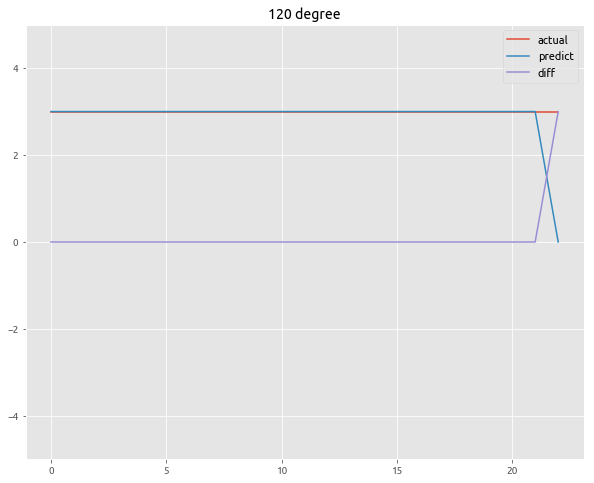

RMSE: 37.53259453027346 


fftfilter
5.770130999999765
gamma total
7.805637999999817
coch1
3.0181250000000546
coch2
3.2574150000000373
get avg
0.027255000000423024
fftfilter
5.852687999999944
gamma total
7.996147999999721
coch1
3.220252000000073
coch2
3.2383859999999913
get avg
0.027496000000155618


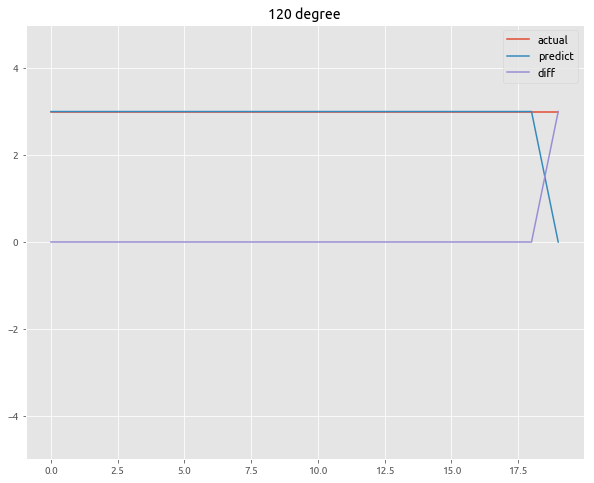

RMSE: 40.24922359499622 


fftfilter
13.579717999999957
gamma total
17.006701999999677
coch1
3.4623350000001665
coch2
3.641395999999986
get avg
0.1997220000002926
fftfilter
12.205481999999847
gamma total
15.61785400000008
coch1
3.436894999999822
coch2
3.611711000000014
get avg
0.15530500000022585


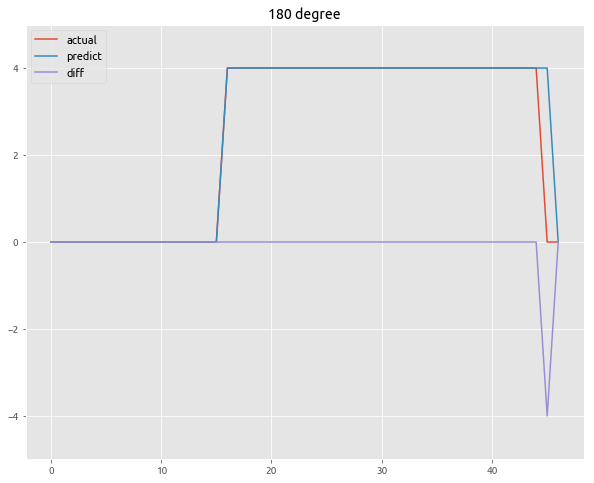

RMSE: 26.25569846962102 


fftfilter
7.7166879999999765
gamma total
10.179589999999735
coch1
3.2534260000002178
coch2
3.3186319999999796
get avg
0.07114799999999377
fftfilter
7.811688000000231
gamma total
10.25675799999999
coch1
3.280062000000271
coch2
3.388586999999916
get avg
0.06972700000005716


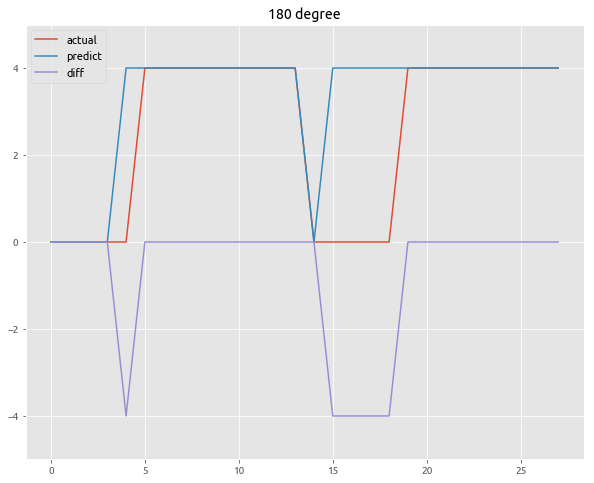

RMSE: 76.06388292556649 


fftfilter
5.342942000000221
gamma total
7.170924000000014
coch1
2.5846690000003036
coch2
3.1655000000000655
get avg
0.02302400000007765
fftfilter
4.779935000000023
gamma total
6.608342999999877
coch1
2.6802240000001802
coch2
3.1813379999998688
get avg
0.022830000000340078


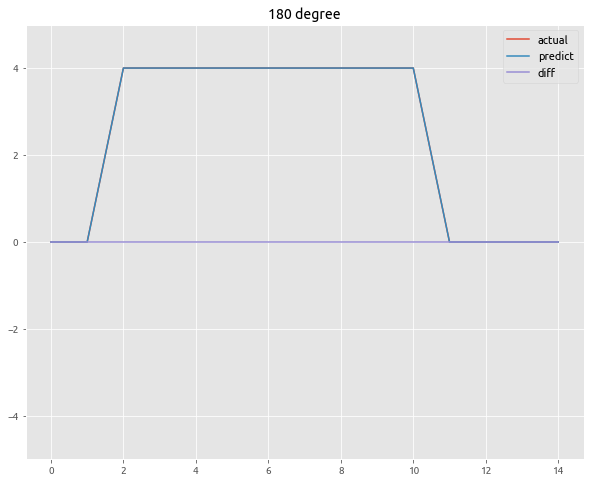

RMSE: 0.0 


total_rmse: 68.8118162948931


In [37]:
rmse_list = []
k = 0

for i in val_list:
    if(i < 50):
        vad_pred, pred = predict(model, samples[i])
    elif((i >= 50) & (i < n_20)):
        vad_pred, pred = predict(model, samples_20[i - 50])
    elif((i >= n_20) & (i < n_40)):
        vad_pred, pred = predict(model, samples_40[i - n_20])
    elif((i >= n_40) & (i < n_80)):
        vad_pred, pred = predict(model, samples_80[i - n_40])
    elif((i >= n_80) & (i < n_100)):
        vad_pred, pred = predict(model, samples_100[i - n_80])
    elif((i >= n_100) & (i < n_140)):
        vad_pred, pred = predict(model, samples_140[i - n_100])
    elif((i >= n_140) & (i < n_160)):
        vad_pred, pred = predict(model, samples_160[i - n_140])
    error = total_label[i].reshape(-1, 1) - pred
    plt.figure(figsize=(10, 8))
    plt.title('%d degree' %(edge_list[k]))
    plt.plot(range(0, len(total_label[i])), total_label[i], label='actual')
    plt.plot(range(0, len(pred)), pred, label='predict')
    plt.plot(range(0, len(error)), error, label='diff')
    plt.ylim(-5, 5)
    plt.legend()
    plt.show()
    
    for j in range(0, len(error)):
        if((vad_label[i][j] == 0) & (vad_pred[j] != 0) | ((vad_label[i][j] != 0) & (vad_pred[j] == 0))):
            error[j] = 180
        else:
            abs_error = abs(error[j])
            error[j] = 20 * abs_error
            
    rmse = np.sqrt((error ** 2).mean())
    rmse_list.append(rmse)
    print('RMSE:', rmse, '\n\n')
    k = k + 1
    
print('total_rmse:', np.array(rmse_list).mean())